# Analitika financija - Prva laboratorijska vježba

---


<b>Uvod i upute za predaju</b>

Prva laboratorijska vježba iz Analitike financija sastoji se od pet zadataka koje je potrebno riješiti u programskom jeziku Python, rješavajući zadatke unutar Juypyter bilježnice. 

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima.

Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje. 

Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.

Vaše rješenje (bilježnicu) potrebno je poslati na e-mail adresu `tomislav.kovacevic@fer.hr` u formatu naziva `IME_PREZIME_JMBAG.ipynb`. Na istu e-mail adresu možete se javiti s bilo kakvim pitanjima vezanim uz ovu vježbu.

Na ovoj vježbi možete ostvariti ukupno 20 bodova. Vaša Jupyter bilježnica ocjenjivat će se s mogućnošću ostvarivanja do 10 bodova, a na usmenoj obrani moguće je ostvariti preostalih 10 bodova. 

Napominjemo da će se prilikom ocjenjivanja strogo provjeravati originalnost vaših rješenja. Predstavljanje tuđeg rada kao vlastitog je kršenje kodeksa ponašanja studenata i takvi slučajevi bit će prijavljeni povjerenstvu za stegovnu odgovornost.

Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 30\% ukupnih bodova iz laboratorijskih vježbi. Nadoknade laboratorijskih vježbi neće biti organizirane.


## Zadatak 1 - Povezanost BDP-a, inflacije i kamatnih stopa 

Tri .csv datoteke, smještene u mapi data/zadatak_1, sadrže kvartalne povijesne podatke za:

1. Nominalni BDP (GDP.csv)
2. Realni BDP (GDPC1.csv)
3. Kamatne stope (IR.csv)

Svaka datoteka uključuje dva stupca:

Datum: Kvartalno razdoblje,
Vrijednost: Zabilježeni podatak (BDP ili kamatna stopa) za taj kvartal.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Učitavanje podataka za Nominalni BDP, Realni BDP i Kamatne stope
gdp_df = pd.read_csv('data/zadatak_1/GDP.csv')
real_gdp_df = pd.read_csv('data/zadatak_1/GDPC1.csv')
ir_df = pd.read_csv('data/zadatak_1/IR.csv')

# Pregled svake datoteke kako bismo razumjeli strukturu podataka
gdp_df.head(), real_gdp_df.head(), ir_df.head()

(         DATE      GDP
 0  1947-01-01  243.164
 1  1947-04-01  245.968
 2  1947-07-01  249.585
 3  1947-10-01  259.745
 4  1948-01-01  265.742,
          DATE     GDPC1
 0  1947-01-01  2182.681
 1  1947-04-01  2176.892
 2  1947-07-01  2172.432
 3  1947-10-01  2206.452
 4  1948-01-01  2239.682,
          DATE  IR3TIB01USM156N
 0  1964-06-01             3.86
 1  1964-07-01             3.87
 2  1964-08-01             3.85
 3  1964-09-01             3.87
 4  1964-10-01             3.94)

Pretvorite kvartalne podatke u godišnje prosjeke.

In [3]:
def yearly_average(df, decimals=2):
    # Create a copy of the original dataframe
    df_copy = df.copy()
    
    # Convert DATE column to datetime if it's not already
    df_copy['DATE'] = pd.to_datetime(df_copy['DATE'])
    
    # Extract year from DATE column
    df_copy['Year'] = df_copy['DATE'].dt.year

    # Drop the original DATE column
    df_copy.drop(columns=['DATE'], inplace=True)
    
    # Group by year and calculate mean for all other columns
    yearly_df = df_copy.groupby('Year').mean()
    
    # Round to specified number of decimals
    yearly_df = yearly_df.round(decimals)
    
    # Reset index to make Year a column instead of index
    yearly_df = yearly_df.reset_index()
    
    return yearly_df

In [4]:
gdp_yearly_df = yearly_average(gdp_df)
real_gdp_yearly_df = yearly_average(real_gdp_df)
ir_yearly_df = yearly_average(ir_df, 2)

In [5]:
gdp_yearly_df.head(), real_gdp_yearly_df.head(), ir_yearly_df.head()

(   Year     GDP
 0  1947  249.62
 1  1948  274.47
 2  1949  272.48
 3  1950  299.83
 4  1951  346.91,
    Year    GDPC1
 0  1947  2184.61
 1  1948  2274.63
 2  1949  2261.93
 3  1950  2458.53
 4  1951  2656.32,
    Year  IR3TIB01USM156N
 0  1964             3.93
 1  1965             4.34
 2  1966             5.48
 3  1967             5.02
 4  1968             5.86)

Vizualizirajte godišnje prosjeke učitanih podataka i njihove promjene između godina.

In [6]:
def plot_yearly_changes(df, value_column):
    '''
    Creates two subplots:
    1. Original values over years
    2. Year-over-year changes
    
    Parameters:
    df: DataFrame with 'Year' and one other column
    value_column: name of the column containing values to analyze
    '''
    
    # Calculate year-over-year changes
    yearly_changes = df[value_column].diff()
    
    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    # Plot 1: Original values
    ax1.plot(df['Year'], df[value_column], marker='o')
    ax1.set_title(f'{value_column} Over Time')
    ax1.set_xlabel('Year')
    ax1.set_ylabel(value_column)
    ax1.grid(True)
    
    # Plot 2: Year-over-year changes
    ax2.plot(df['Year'], yearly_changes, marker='o', color='red')
    ax2.set_title(f'Year-over-Year Changes in {value_column}')
    ax2.set_xlabel('Year')
    ax2.set_ylabel(f'Change in {value_column}')
    ax2.grid(True)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plots
    plt.show()

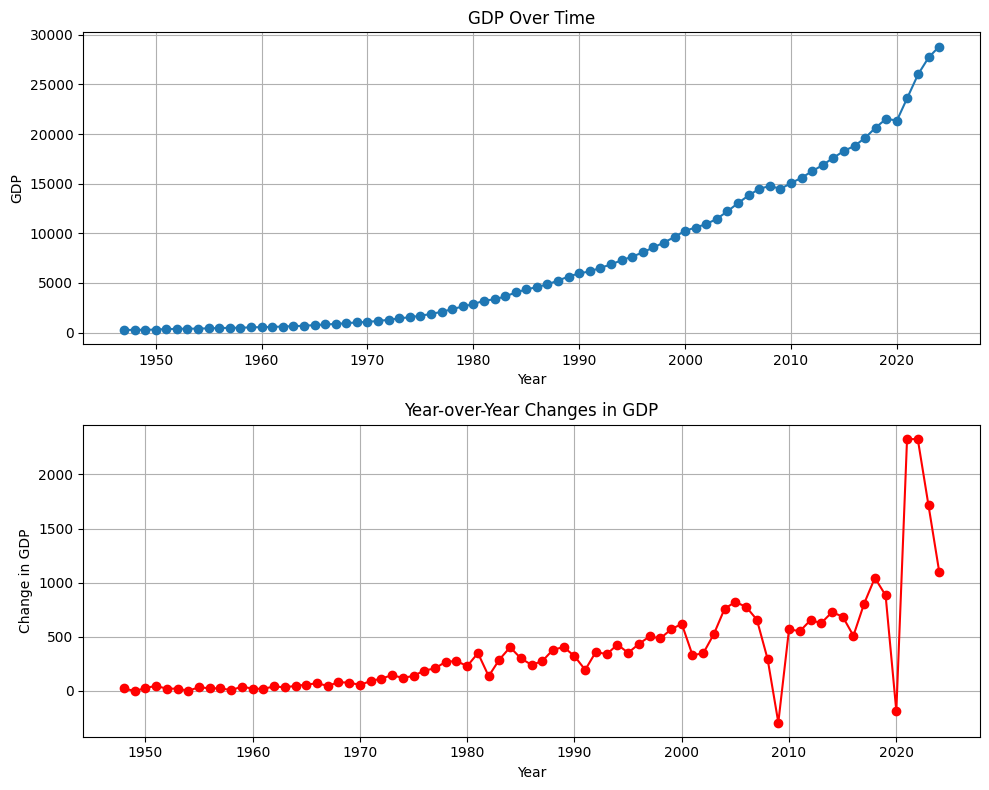

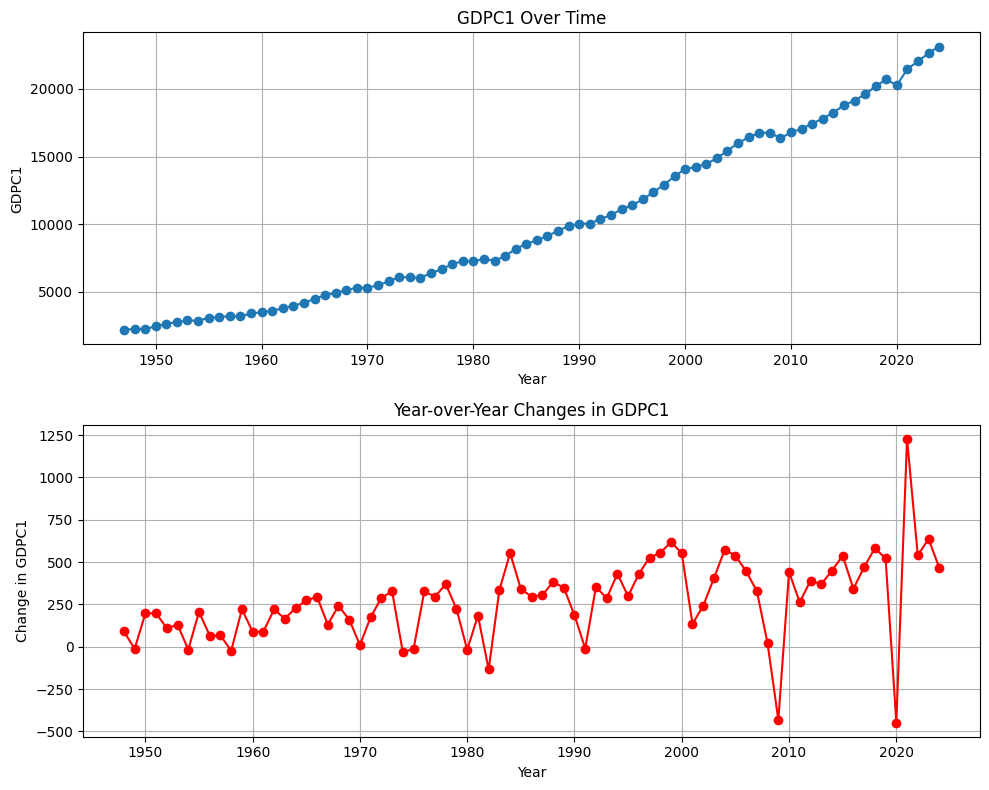

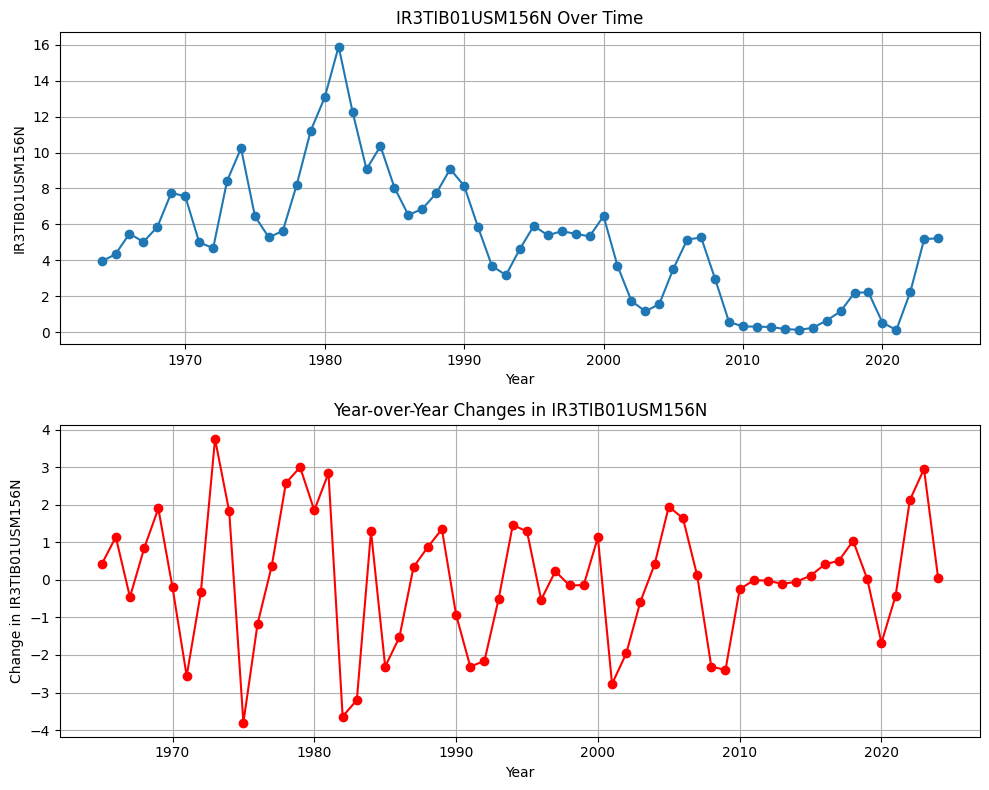

In [7]:
plot_yearly_changes(gdp_yearly_df, 'GDP')
plot_yearly_changes(real_gdp_yearly_df, 'GDPC1')
plot_yearly_changes(ir_yearly_df, 'IR3TIB01USM156N')

Koristeći podatke o Realnom i Nominalnom BDP-u, izračunajte stopu inflacije.
Vizualizirajte stopu inflacije i kamatne stope na istom grafu.

In [ ]:
def calculate_inflation(nominal_bdp_df, real_bdp_df):
    # Create GDP deflator by dividing nominal by real GDP for matching years
    gdp_deflator_df = nominal_bdp_df.merge(real_bdp_df, on='Year', suffixes=('_nominal', '_real'))
    gdp_deflator_df['GDP_deflator'] = gdp_deflator_df.iloc[:, 1] / gdp_deflator_df.iloc[:, 2]
    
    # Calculate inflation using the formula (GDP_deflator(t) - GDP_deflator(t-1)) / GDP_deflator(t)
    inflation_df = pd.DataFrame()
    inflation_df['Year'] = gdp_deflator_df['Year']
    inflation_df['GDP_deflator'] = gdp_deflator_df['GDP_deflator']
    
    # Calculate year-over-year change in GDP deflator
    inflation_df['Inflation'] = (inflation_df['GDP_deflator'] - 
                               inflation_df['GDP_deflator'].shift(1)) / inflation_df['GDP_deflator'].shift(1) * 100
    
    # Drop the GDP_deflator column and remove the first row (which will have NaN due to shift)
    inflation_df = inflation_df[['Year', 'Inflation']].dropna()
    
    return inflation_df

In [9]:
inflation_yearly_df = calculate_inflation(gdp_yearly_df, real_gdp_yearly_df)

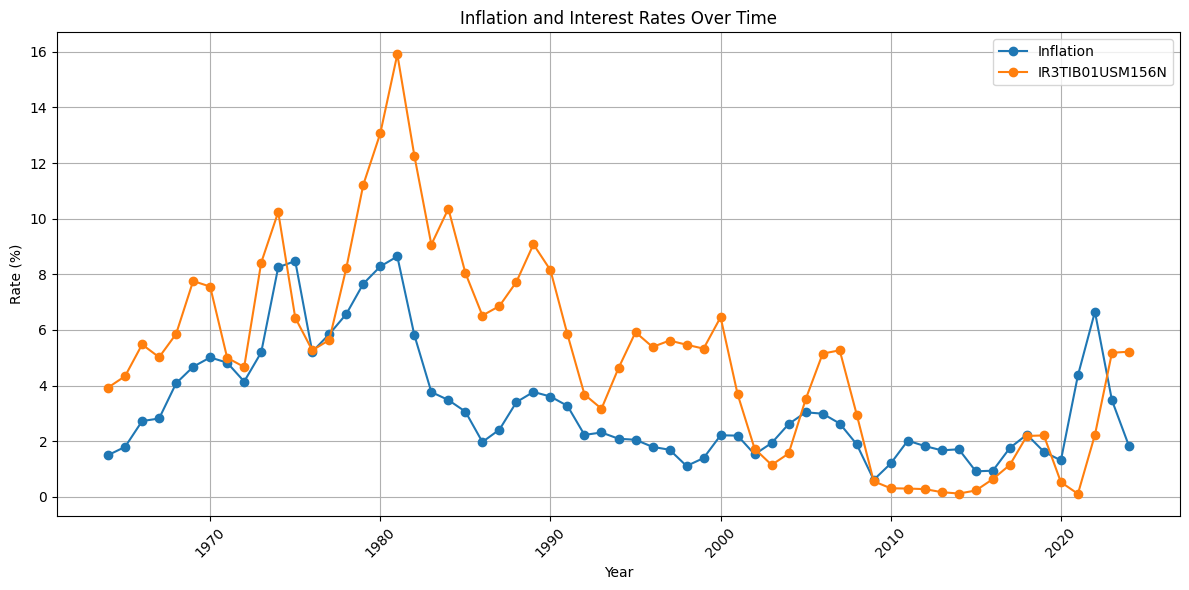

In [10]:
# Merge the DataFrames on 'Year'
merged_df = pd.merge(inflation_yearly_df, ir_yearly_df, on='Year', how='inner')

# Plot the values
plt.figure(figsize=(12, 6))

# Plot each column except 'Year'
for column in merged_df.columns:
    if column != 'Year':
        plt.plot(merged_df['Year'], merged_df[column], label=column, marker='o')

plt.title('Inflation and Interest Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Zadatak 2 -- Knjiga naloga i njeno uzorkovanje

Implementirajte tri različite metode uzorkovanja knjige naloga: (1) vremensko uzorkovanje, (2) uzorkovanje po količini, (3) uzorkovanje po prometu, te konačno usporediti rezultate dobivene svakom metodom.


U mapi data/zadatak_2 nalaze se dvije .csv datoteke koje opisuju knjigu naloga dionice Applea za jedan dan trgovanja:

1. Datoteka s porukama sadrži 5 stupaca, tj. informacije o vremenskim oznakama (u sekundama od ponoći), tipu događaja (npr. novi nalog, izvršenje, otkazivanje), veličini naloga, cijeni i smjeru (1 = kupnja, -1 = prodaja).
2. Datoteka knjige naloga sadrži 4 stupca s informacijama o vremenskoj oznaci, najboljoj bid i ask cijeni te količini dostupnoj za kupnju i prodaju u tom trenutku. Cijena je prikazana kao cijeli broj (pomnožena s 10000).

U datoteci s porukama (messages.csv) od interesa su događaji tipa 4 i 5, tj. izvršenje kupnje i prodaje. Također, preporučujemo pročitati dokument LOBSTER_SampleFiles_ReadMe.txt, koji se nalazi u mapi data/zadatak_2.

Za detalje o sve tri metode uzorkovanja proučite 2. poglavlje knjige de Prado, M. L., Advances in Financial Machine Learning. New Jersey: Wiley, 2018. 



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [12]:
# Učitavanje podataka iz datoteke s porukama i knjige naloga
messages_columns = ['Time after midnight (s)', 'Type', 'Order ID', 'Size', 'Price', 'Direction']
order_book_columns = ['Level 1 Ask Price', 'Level 1 Ask Volume', 'Level 1 Bid Price', 'Level 1 Bid Volume']

messages_df = pd.read_csv('data/zadatak_2/messages.csv', names=messages_columns, header=None)
order_book_df = pd.read_csv('data/zadatak_2/order_book.csv', names=order_book_columns, header=None)

# Pregled prvih nekoliko redaka za uvid u strukturu podataka
messages_df.head(), order_book_df.head()

(   Time after midnight (s)  Type  Order ID  Size    Price  Direction
 0             34200.004241     1  16113575    18  5853300          1
 1             34200.025552     1  16120456    18  5859100         -1
 2             34200.201743     3  16120456    18  5859100         -1
 3             34200.201781     3  16120480    18  5859200         -1
 4             34200.205573     1  16167159    18  5853600          1,
    Level 1 Ask Price  Level 1 Ask Volume  Level 1 Bid Price  \
 0            5859400                 200            5853300   
 1            5859100                  18            5853300   
 2            5859200                  18            5853300   
 3            5859300                 100            5853300   
 4            5859300                 100            5853600   
 
    Level 1 Bid Volume  
 0                  18  
 1                  18  
 2                  18  
 3                  18  
 4                  18  )

In [13]:
with pd.ExcelWriter('transactions.xlsx') as writer:
    messages_df.to_excel(writer, sheet_name='messages', index=False)
    order_book_df.to_excel(writer, sheet_name='order_book', index=False)

print('DataFrames saved to transactions.xlsx with separate sheets.')

DataFrames saved to transactions.xlsx with separate sheets.


Prva metoda uzorkovanja koju je potrebno razviti je vremensko uzorkovanje. Ova metoda grupira naloge u definirane vremenske intervale (standardno 1 minuta) i sažima ih pomoću OHLCV podataka:

- Prva cijena (Open),
- Najviša cijena (High),
- Najniža cijena (Low),
- Zadnja cijena (Close),
- Ukupan volumen (Volume).

Napišite funkciju koja prima podatke, grupira ih po vremenskim intervalima i generira OHLCV podatke za svaki interval.
Izlaz funckije neka bude `pd.DataFrame`, s vremenskim oznakama kao indeksom.


In [14]:
def rename_indexes_time(ind):
    hours = int(ind // 3600)
    minutes = int((ind % 3600) // 60)
    seconds = int(ind % 60)
    return f'{hours:02d}:{minutes:02d}:{seconds:02d}'

In [15]:
def round_price(df, columns):
    '''Performs modulo 10000 and rounds to 2 decimals for specified columns'''

    df_processed = df.copy()

    for col in columns:
        if col in df.columns:
            df_processed[col] = (df_processed[col] / 10000).round(2)
        else:
            print(f'Warning: Column not found in DataFrame')
    
    return df_processed

In [16]:
def time_based_sampling(data_df, interval_minutes=1, interval_hours=0):

    interval_length = interval_hours * 60 * 60 + interval_minutes * 60 # in seconds
    df_OHLCV = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

    start_time = np.floor(data_df.loc[0, 'Time after midnight (s)']) # In seconds

    for _, row in data_df.iterrows():
        if row['Type'] in [4, 5]: # This means execution of order
            current_interval = (row['Time after midnight (s)'] - start_time) // interval_length
            price = row['Price']
            volume = row['Size']

            if current_interval not in df_OHLCV.index:
                df_OHLCV.loc[current_interval] = [price, price, price, price, volume]
            else:
                if price > df_OHLCV.loc[current_interval, 'High']:
                    df_OHLCV.loc[current_interval, 'High'] = price
                elif price < df_OHLCV.loc[current_interval, 'Low']:
                    df_OHLCV.loc[current_interval, 'Low'] = price
                df_OHLCV.loc[current_interval, 'Volume'] += volume
                df_OHLCV.loc[current_interval, 'Close'] = price
    
    df_OHLCV.index = start_time + df_OHLCV.index * interval_length
    df_OHLCV.rename(index=rename_indexes_time, inplace=True)
    df_OHLCV = round_price(df_OHLCV, columns=['Open', 'High', 'Low', 'Close'])
    
    return df_OHLCV


In [17]:
df_OHLCV_time = time_based_sampling(messages_df)

In [18]:
df_OHLCV_time.head(), df_OHLCV_time.tail()

(            Open    High     Low   Close   Volume
 09:30:00  585.74  585.93  585.30  585.63  16390.0
 09:31:00  585.63  585.64  584.61  585.16  19393.0
 09:32:00  585.22  585.44  584.82  585.43   7469.0
 09:33:00  585.63  587.10  585.39  586.86  29442.0
 09:34:00  586.95  587.80  586.95  587.21  16787.0,
             Open    High     Low   Close   Volume
 15:55:00  578.03  578.16  577.71  577.93  24787.0
 15:56:00  577.91  578.16  577.90  577.94  21972.0
 15:57:00  577.97  578.00  577.73  577.86  23230.0
 15:58:00  577.84  577.88  577.51  577.54  41088.0
 15:59:00  577.54  577.67  577.45  577.64  61588.0)

Druga metoda uzorkovanja koju je potrebno razviti je Uzorkovanje po količini. Ova metoda grupira naloge u intervale prema količini, standardno po 1000 jedinica volumena, i za svaki interval generira OHLC podatke. Vremenski razmak između dviju točaka u ovoj metodi ovisi o vremenu potrebnom za trgovanje 1000 jedinica volumena.

Napišite funkciju koja prima podatke, grupira ih po volumenu i generira OHLC podatke za svaki interval količine.
Izlaz funckije neka bude `pd.DataFrame`, s vremenskim oznakama kao indeksom.




In [19]:
def volume_based_sampling(data_df, volume_interval=1000):

    df_OHLCV = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

    current_interval = np.floor(data_df.loc[0, 'Time after midnight (s)']) # In seconds
    current_interval_volume = 0

    for _, row in data_df.iterrows():
        if row['Type'] in [4, 5]: # This means execution of order
            price = row['Price']
            volume = row['Size']

            if len(df_OHLCV) == 0:
                # Create new interval
                current_interval = row['Time after midnight (s)']
                df_OHLCV.loc[current_interval] = [price, price, price, price, 0]
            
            current_interval_volume += volume

            if current_interval_volume >= volume_interval:

                # Order belongs to 2 different intervals
                if current_interval_volume > volume_interval: 
                    if price > df_OHLCV.loc[current_interval, 'High']:
                        df_OHLCV.loc[current_interval, 'High'] = price
                    elif price < df_OHLCV.loc[current_interval, 'Low']:
                        df_OHLCV.loc[current_interval, 'Low'] = price
                    df_OHLCV.loc[current_interval, 'Volume'] = volume_interval
                    df_OHLCV.loc[current_interval, 'Close'] = price

                    current_interval_volume -= volume_interval

                # Create new interval
                current_interval = row['Time after midnight (s)']
                df_OHLCV.loc[current_interval] = [price, price, price, price, current_interval_volume]
                
            else:
                if price > df_OHLCV.loc[current_interval, 'High']:
                    df_OHLCV.loc[current_interval, 'High'] = price
                elif price < df_OHLCV.loc[current_interval, 'Low']:
                    df_OHLCV.loc[current_interval, 'Low'] = price
                df_OHLCV.loc[current_interval, 'Volume'] = current_interval_volume
                df_OHLCV.loc[current_interval, 'Close'] = price


    df_OHLCV.rename(index=rename_indexes_time, inplace=True)
    df_OHLCV = round_price(df_OHLCV, columns=['Open', 'High', 'Low', 'Close'])
    
    return df_OHLCV


In [20]:
df_OHLCV_volume = volume_based_sampling(messages_df)

In [21]:
df_OHLCV_volume.head(), df_OHLCV_volume.tail()

(            Open    High     Low   Close  Volume
 09:30:00  585.74  585.93  585.70  585.86  1000.0
 09:30:00  585.86  585.86  585.45  585.46  1000.0
 09:30:02  585.46  585.70  585.45  585.68  1000.0
 09:30:05  585.68  585.68  585.38  585.39  1000.0
 09:30:12  585.39  585.61  585.36  585.61  1000.0,
             Open    High     Low   Close  Volume
 15:59:55  577.56  577.64  577.56  577.64  1000.0
 15:59:57  577.64  577.64  577.60  577.60  1000.0
 15:59:58  577.60  577.66  577.58  577.62  1000.0
 15:59:59  577.62  577.66  577.55  577.60  1000.0
 15:59:59  577.60  577.64  577.60  577.64   140.0)

Treća metoda uzorkovanja je uzorkovanje po prometu, koje koristi intervale definirane prema ukupnoj vrijednosti trgovanja (cijena × volumen, standardno 100000 USD). Cilj je grupirati naloge prema ukupnom prometu i sažeti ih u OHLCV formatu. Vremenski razmak između dviju točaka u ovoj metodi ovisi o vremenu potrebnom za trgovanje 100000 USD. 

Implementirajte funkciju koja prima podatke, grupira ih prema intervalima prometa i generira OHLCV podatke za svaki interval. Izlaz funckije neka bude `pd.DataFrame`, s vremenskim oznakama kao indeksom.


In [22]:
def dollar_volume_sampling(data_df, dollar_interval=100000):
    df_OHLCV = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
    current_interval_dollars = 0
    dollar_multiplier = 10000

    for _, row in data_df.iterrows():
        if row['Type'] in [4, 5]:  # Execution of order
            price = row['Price'] / dollar_multiplier
            volume = row['Size']
            order_money = price * volume

            # First trade or we need a new interval
            if len(df_OHLCV) == 0 or current_interval_dollars >= dollar_interval:
                current_interval = row['Time after midnight (s)']
                df_OHLCV.loc[current_interval] = [price, price, price, price, 0]
                current_interval_dollars = 0

            if current_interval_dollars + order_money > dollar_interval:
                remaining_dollars = dollar_interval - current_interval_dollars
                volume_in_current = remaining_dollars / price
                volume_in_next = volume - volume_in_current

                df_OHLCV.loc[current_interval, 'High'] = max(price, df_OHLCV.loc[current_interval, 'High'])
                df_OHLCV.loc[current_interval, 'Low'] = min(price, df_OHLCV.loc[current_interval, 'Low'])
                df_OHLCV.loc[current_interval, 'Close'] = price
                df_OHLCV.loc[current_interval, 'Volume'] += volume_in_current

                current_interval = row['Time after midnight (s)']
                df_OHLCV.loc[current_interval] = [price, price, price, price, volume_in_next]
                current_interval_dollars = price * volume_in_next
            else:
                # Update current interval normally
                df_OHLCV.loc[current_interval, 'High'] = max(price, df_OHLCV.loc[current_interval, 'High'])
                df_OHLCV.loc[current_interval, 'Low'] = min(price, df_OHLCV.loc[current_interval, 'Low'])
                df_OHLCV.loc[current_interval, 'Close'] = price
                df_OHLCV.loc[current_interval, 'Volume'] += volume
                current_interval_dollars += order_money

    df_OHLCV.rename(index=rename_indexes_time, inplace=True)
    return df_OHLCV

In [23]:
df_OHLCV_dollar = dollar_volume_sampling(messages_df)

In [24]:
df_OHLCV_dollar.head(), df_OHLCV_dollar.tail()

(            Open    High     Low   Close      Volume
 09:30:00  585.74  585.78  585.73  585.78  170.720424
 09:30:00  585.93  585.93  585.70  585.70  170.713744
 09:30:00  585.70  585.86  585.70  585.75  170.714288
 09:30:01  585.75  585.75  585.75  585.75  226.850670
 09:30:01  585.74  585.74  585.64  585.64  170.731832,
             Open     High     Low    Close      Volume
 15:59:59  577.59  577.590  577.58  577.580  173.134410
 15:59:59  577.58  577.580  577.55  577.550  173.143645
 15:59:59  577.55  577.550  577.55  577.550  173.145182
 15:59:59  577.55  577.600  577.55  577.600  173.137406
 15:59:59  577.60  577.635  577.60  577.635  124.175710)

Nakon što ste implementirali sve tri metode uzorkovanja, vizualizirajte dobivene podatke kako biste ih usporedili:
1. Prikažite OHLC podatke za svaku metodu na različitom grafu (primjetitie: `open`, `high`, `low`, `close` su četiri različite linije na grafu)
2. Na odvojenom grafu prikažite `close` vrijednosti dobivene koristeći sve tri metode. 

In [25]:
def plot_OHLC(df):
    '''
    Plot Open, High, Low, Close prices from a DataFrame
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing 'Open', 'High', 'Low', 'Close' columns
    '''
    plt.figure(figsize=(12, 6))
    
    plt.plot(df.index, df['Open'], label='Open', color='blue', alpha=0.7)
    plt.plot(df.index, df['High'], label='High', color='green', alpha=0.7)
    plt.plot(df.index, df['Low'], label='Low', color='red', alpha=0.7)
    plt.plot(df.index, df['Close'], label='Close', color='black', alpha=0.7)
    
    plt.title('Price Chart', fontsize=14, pad=15)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='best')
    
    # Get 5 evenly spaced indices for x-ticks
    tick_indices = np.linspace(0, len(df.index) - 1, 5, dtype=int)
    plt.xticks(df.index[tick_indices], df.index[tick_indices], rotation=45)
    
    plt.tight_layout()
    
    plt.show()

Time based sampling

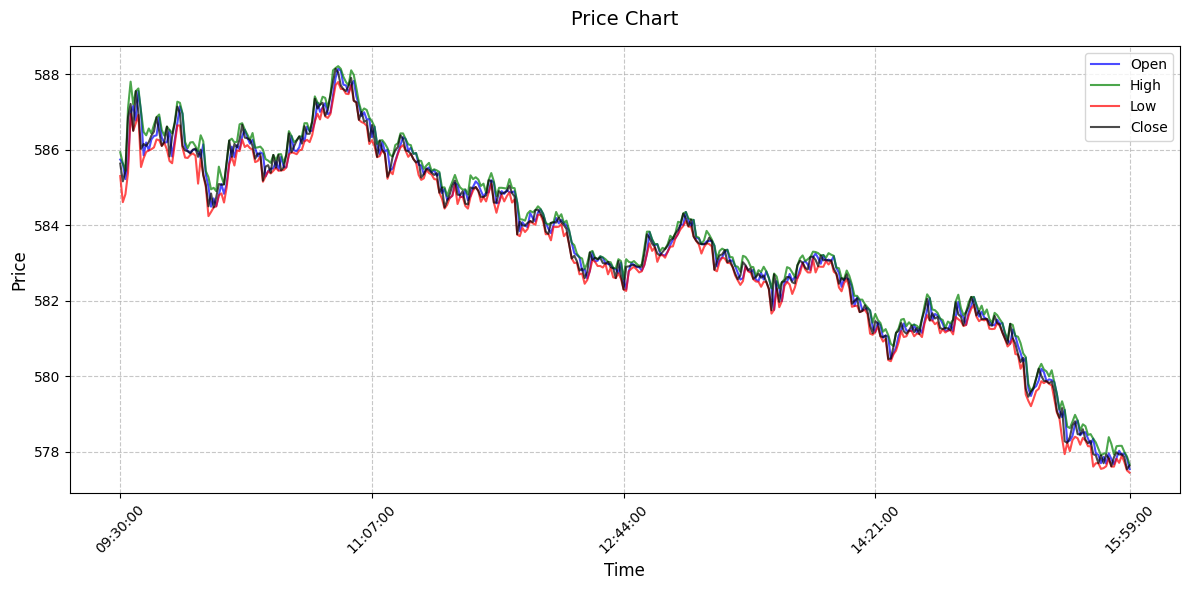

In [26]:
plot_OHLC(df_OHLCV_time)

Volume based sampling

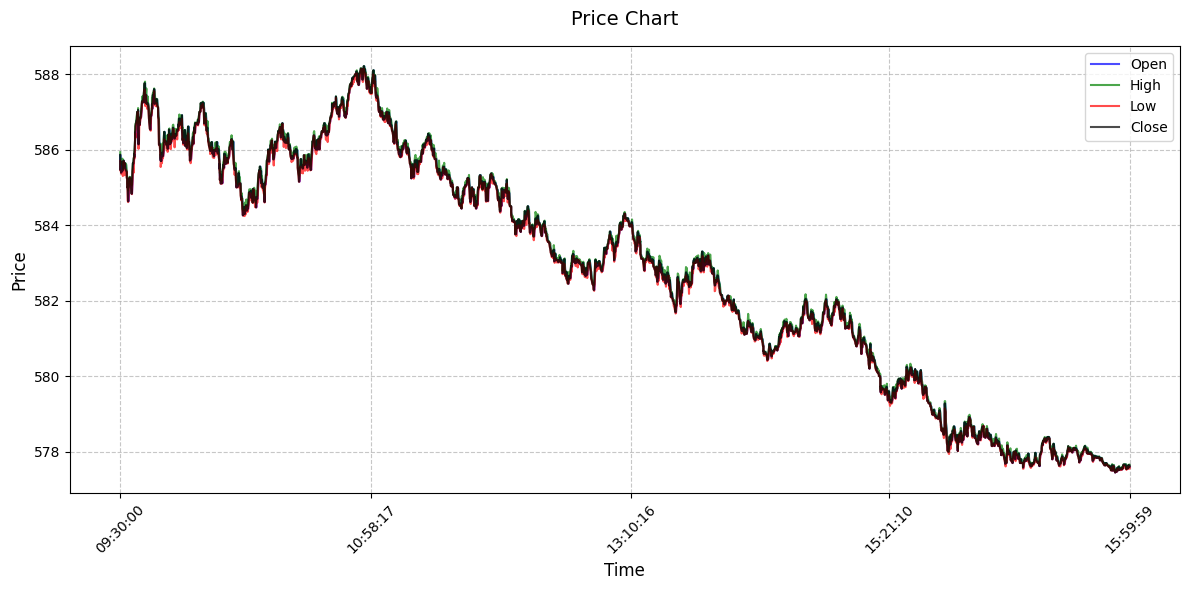

In [27]:
plot_OHLC(df_OHLCV_volume)

Dollar volume based sampling

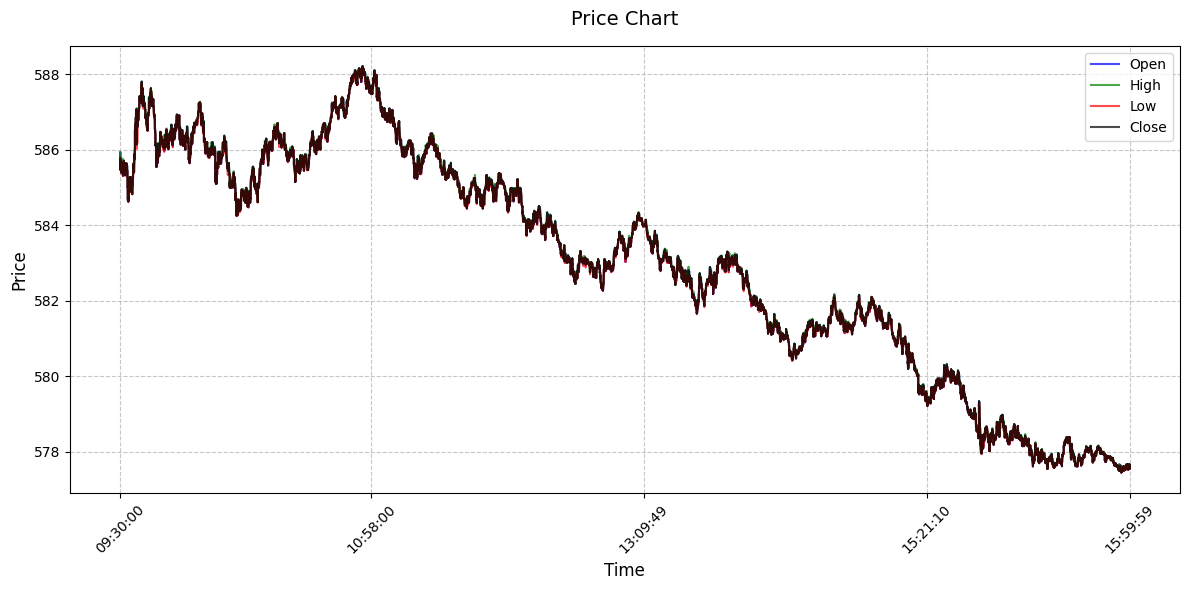

In [28]:
plot_OHLC(df_OHLCV_dollar)

Close values

In [29]:
def plot_multiple_closes(dataframes, labels=None):
    '''Plot multiple stock closing prices with 5 time ticks, each in its own subplot'''
    # Determine number of rows needed (2 columns)
    n_plots = len(dataframes)
    n_rows = (n_plots + 1) // 2  # Ceiling division to get number of rows needed
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
    axes = axes.flatten()  # Flatten axes array for easier indexing
    
    # Create default labels if none provided
    if labels is None:
        labels = [f'Series {i+1}' for i in range(len(dataframes))]
    
    # Plot each dataframe in its own subplot
    for i, (df, label) in enumerate(zip(dataframes, labels)):
        # Plot data
        axes[i].plot(range(len(df)), df['Close'], label=label, alpha=0.7)
        
        # Set 5 evenly spaced x-ticks using string time indexes
        n_points = len(df)
        tick_positions = np.linspace(0, n_points-1, 5, dtype=int)
        tick_labels = [df.index[i] for i in tick_positions]
        
        # Customize subplot
        axes[i].set_xticks(tick_positions)
        axes[i].set_xticklabels(tick_labels, rotation=45)
        axes[i].set_title(f'{label} Close Price')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Price')
        axes[i].grid(True)
        axes[i].legend()
    
    # Remove empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

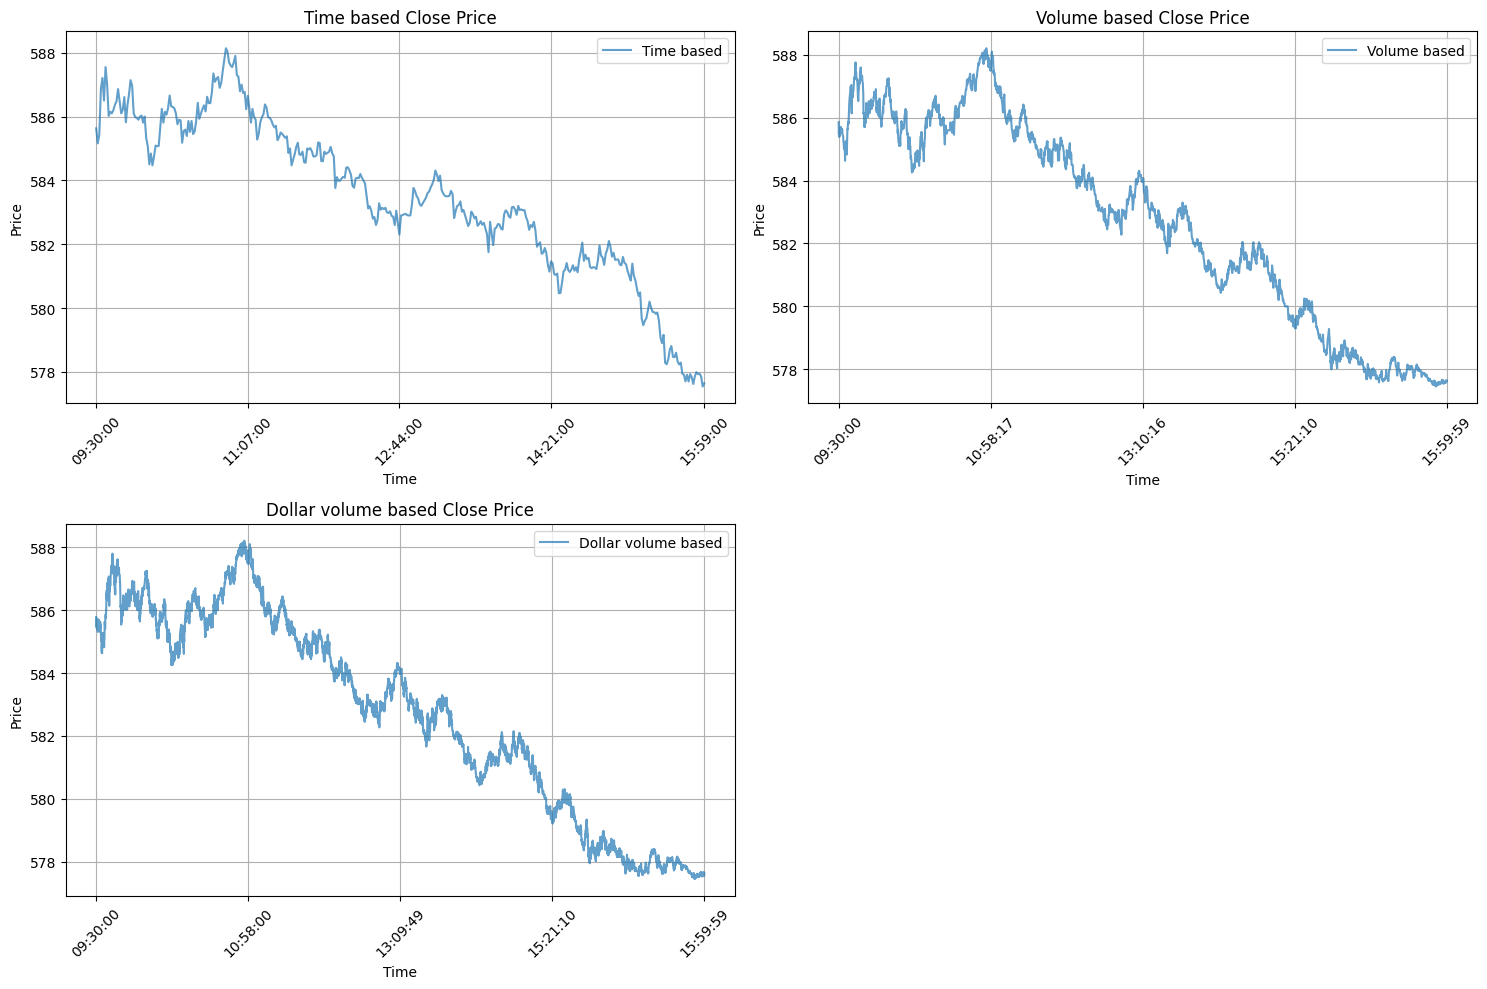

In [30]:
plot_multiple_closes([df_OHLCV_time, df_OHLCV_volume, df_OHLCV_dollar], labels=['Time based', 'Volume based', 'Dollar volume based'])

Za `close` vrijednosti dobivene koristeći sve tri metode, izračunajte prosječno vrijeme između vremenskih točaka i usporedite dobivene rezultate.

In [31]:
def calculate_avg_time_diff(time_strings):
    '''
    Calculate average time difference between consecutive times in HH:MM:SS format
    
    Parameters:
    time_strings: list of strings in format 'HH:MM:SS'
    
    Returns:
    float: average time interval in seconds
    '''
    # Convert strings to datetime objects
    times = [datetime.strptime(t, '%H:%M:%S') for t in time_strings]
    
    # Calculate differences in seconds
    differences = []
    for i in range(len(times)-1):
        diff = times[i+1] - times[i]
        differences.append(diff.total_seconds())
    
    # Calculate average difference
    avg_seconds = round(sum(differences) / len(differences), 2)
   
    return avg_seconds

In [32]:
avg_secs_time = calculate_avg_time_diff(df_OHLCV_time.index)
avg_secs_volume = calculate_avg_time_diff(df_OHLCV_volume.index)
avg_secs_dollars = calculate_avg_time_diff(df_OHLCV_dollar.index)

print(f'Time sampling average time difference: {avg_secs_time} seconds')
print(f'Volume sampling average time difference: {avg_secs_volume} seconds')
print(f'Dollar volume sampling average time difference: {avg_secs_dollars} seconds')

Time sampling average time difference: 60.0 seconds
Volume sampling average time difference: 8.24 seconds
Dollar volume sampling average time difference: 1.78 seconds


## Zadatak 3 - Stilizirane činjenice logaritamskih povrata

Stilizirane činjenice, i to:
- autokorelacija logaritamskih povrata,
- autokorelacija apsolutnih logaritamskih povrata,
- teški repovi distribucije povrata,

 potrebno je ispitati na dvije različite frekvencije: minutoj i dnevnoj, te za dva različita financijska instrumenta: dionice Applea i futures ugovore na sirovu naftu (Crude Oil - CL).

Podaci se nalaze u mapi `zadatak_3`, i to:

- Minutni podaci o cijenama dionica Applea i futures ugovora na sirovu naftu su u pojedinačnim .csv datotekama za svaki dan, s vremenskim oznakama od 09:30 do 16:00.
- Dnevni podaci o cijena dionica Applea i futures ugovora na sirovu naftu nalaze se u odvojenim .csv datotekama.


Učitajte podatke i izračunajte logaritamske povrate za dnevne podatke.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
import os

In [34]:
def combine_apple_minutes(directory_path):
    '''
    Combines all CSV files in the specified directory into a single DataFrame.
    
    Args:
        directory_path (str): Path to the directory containing CSV files
        
    Returns:
        pandas.DataFrame: Combined DataFrame of all CSV files
    '''
    # List to store all dataframes
    dfs = []
    
    # Loop through all files in directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.csv'):
            # Create full file path
            file_path = os.path.join(directory_path, filename)
            # Read CSV and append to list
            df = pd.read_csv(file_path)
            dfs.append(df)
    
    # Combine all dataframes
    combined_df = pd.concat(dfs, ignore_index=True)
    
    return combined_df

In [35]:
def calculate_log_returns(data, price_column='Close'):
    data['Log_Return'] = np.log(data[price_column] / data[price_column].shift(1))
    return data.dropna()

In [36]:
apple_daily = pd.read_csv('data/zadatak_3/apple_daily_data.csv')
oil_futures_daily = pd.read_csv('data/zadatak_3/crude_oil_daily_data.csv')

apple_daily = calculate_log_returns(apple_daily)
oil_futures_daily = calculate_log_returns(oil_futures_daily)

/opt/anaconda3/envs/anfin/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
apple_daily.head(), apple_daily.tail()

(                        Date  Adj Close     Close      High       Low  \
 1  2000-01-04 00:00:00+00:00   0.772846  0.915179  0.987723  0.903460   
 2  2000-01-05 00:00:00+00:00   0.784155  0.928571  0.987165  0.919643   
 3  2000-01-06 00:00:00+00:00   0.716296  0.848214  0.955357  0.848214   
 4  2000-01-07 00:00:00+00:00   0.750226  0.888393  0.901786  0.852679   
 5  2000-01-10 00:00:00+00:00   0.737031  0.872768  0.912946  0.845982   
 
        Open     Volume  Log_Return  
 1  0.966518  512377600   -0.088077  
 2  0.926339  778321600    0.014527  
 3  0.947545  767972800   -0.090514  
 4  0.861607  460734400    0.046281  
 5  0.910714  505064000   -0.017744  ,
                            Date   Adj Close       Close        High  \
 5989  2023-10-23 00:00:00+00:00  172.119247  173.000000  174.009995   
 5990  2023-10-24 00:00:00+00:00  172.556992  173.440002  173.669998   
 5991  2023-10-25 00:00:00+00:00  170.228912  171.100006  173.059998   
 5992  2023-10-26 00:00:00+00:00  166

In [38]:
apple_minutes = combine_apple_minutes('data/zadatak_3/AAPL_1min_preprocessed/')
oil_futures_minutes = combine_apple_minutes('data/zadatak_3/CL_1min_preprocessed/')

In [39]:
apple_minutes.head(), apple_minutes.shape

(                  Unnamed: 0      open      high       low     close  \
 0  2022-04-18 09:30:00-04:00  163.6695  164.2387  163.3300  164.2087   
 1  2022-04-18 09:31:00-04:00  164.2387  164.6381  163.9691  164.5982   
 2  2022-04-18 09:32:00-04:00  164.5982  165.0974  164.5482  164.8977   
 3  2022-04-18 09:33:00-04:00  164.8977  165.3471  164.8079  165.3271   
 4  2022-04-18 09:34:00-04:00  165.3371  165.3371  164.8877  164.9236   
 
       volume  
 0  2061456.0  
 1   358753.0  
 2   466491.0  
 3   372261.0  
 4   286183.0  ,
 (235773, 6))

In [40]:
apple_minutes = calculate_log_returns(apple_minutes, 'close')
oil_futures_minutes = calculate_log_returns(oil_futures_minutes, 'close')

In [41]:
apple_minutes.head()

,Unnamed: 0,open,high,low,close,volume,Log_Return
1,2022-04-18 09:31:00-04:00,164.2387,164.6381,163.9691,164.5982,358753.0,0.002369
2,2022-04-18 09:32:00-04:00,164.5982,165.0974,164.5482,164.8977,466491.0,0.001818
3,2022-04-18 09:33:00-04:00,164.8977,165.3471,164.8079,165.3271,372261.0,0.002601
4,2022-04-18 09:34:00-04:00,165.3371,165.3371,164.8877,164.9236,286183.0,-0.002444
5,2022-04-18 09:35:00-04:00,164.9377,165.0974,164.6671,165.0823,392210.0,0.000962


Izračunajte i prikažite autokorelaciju logaritamskih povrata pomoću funkcije `acf` iz biblioteke `statsmodels`, uz 20 zakašnjelih vrijednosti (engl. lag). Je li očit izostanak autokorelacije u logaritamskim povratima u dnevnim podacima?


In [42]:
def plot_log_returns_autocorrelation(df, lags=20, absolute = False):
    '''
    Calculate and plot autocorrelation of log returns
    
    Parameters:
    df : pandas DataFrame containing 'Log_Return' column
    lags : number of lags to calculate (default 20)
    '''
    
    # Calculate autocorrelation
    if not absolute:
        acf_values = acf(df['Log_Return'].dropna(), nlags=lags)[1:]
    else:
        acf_values = acf(df['Log_Return'].dropna().abs(), nlags=lags)[1:]
    
    # Create lags array for x-axis
    lags_array = np.arange(1, lags + 1)
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(lags_array, acf_values, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    
    # Add confidence intervals (95%)
    confidence_interval = 1.96/np.sqrt(len(df['Log_Return'].dropna()))
    plt.axhline(y=confidence_interval, color='b', linestyle='--')
    plt.axhline(y=-confidence_interval, color='b', linestyle='--')
    
    # Customize plot
    plt.title('Autocorrelation of Log Returns')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    
    plt.show()

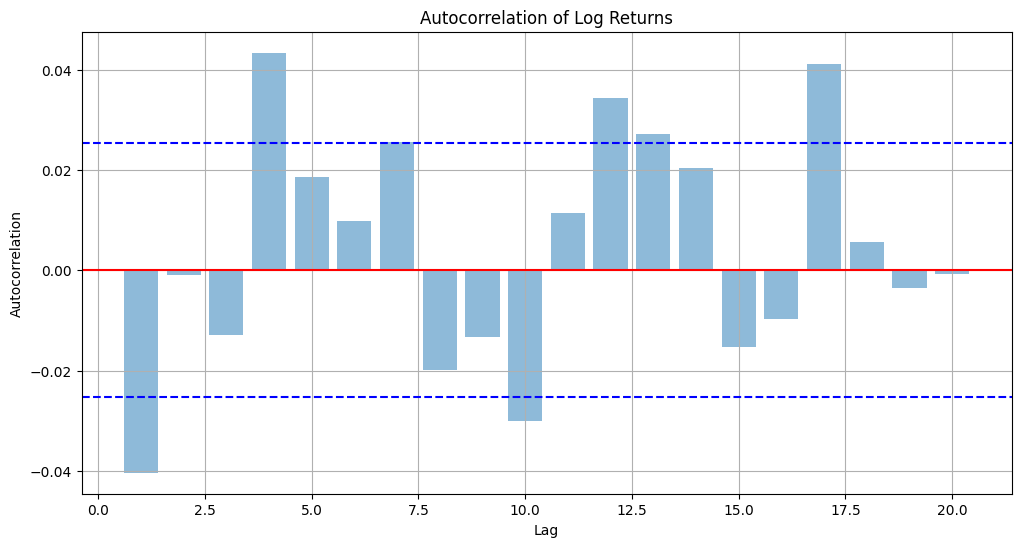

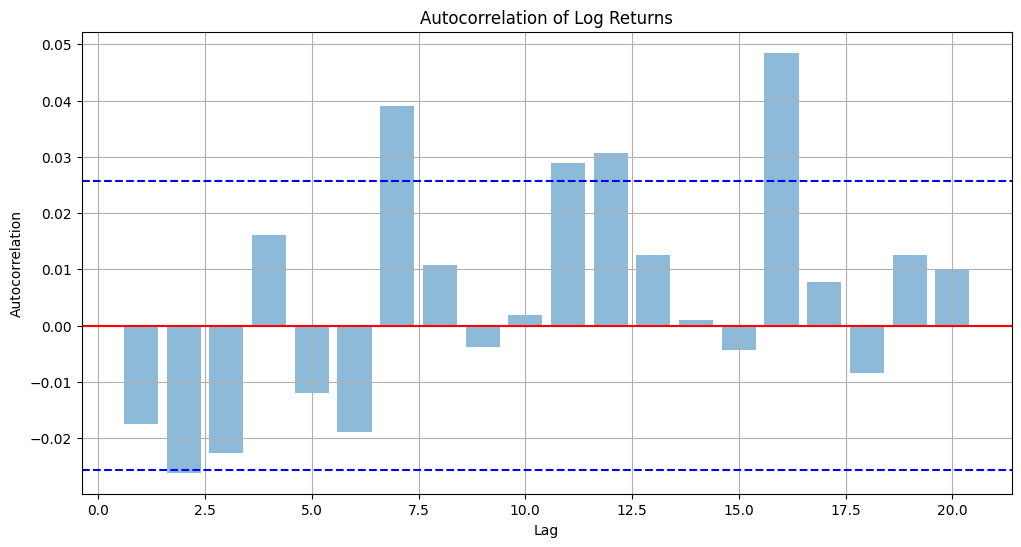

In [43]:
plot_log_returns_autocorrelation(apple_daily)
plot_log_returns_autocorrelation(oil_futures_daily)

Da, autokorelacija je vrlo niska (praktički je jednaka nula).

Izračunajte i prikažite autokorelaciju apsolutnih logaritamskih povrata pomoću funkcije `acf` iz biblioteke `statsmodels`, uz 20 zakašnjelih vrijednosti (engl. lag). Je li očito prisutna autokorelacija u apsolutnim logaritamskim povratima u dnevnim podacima?

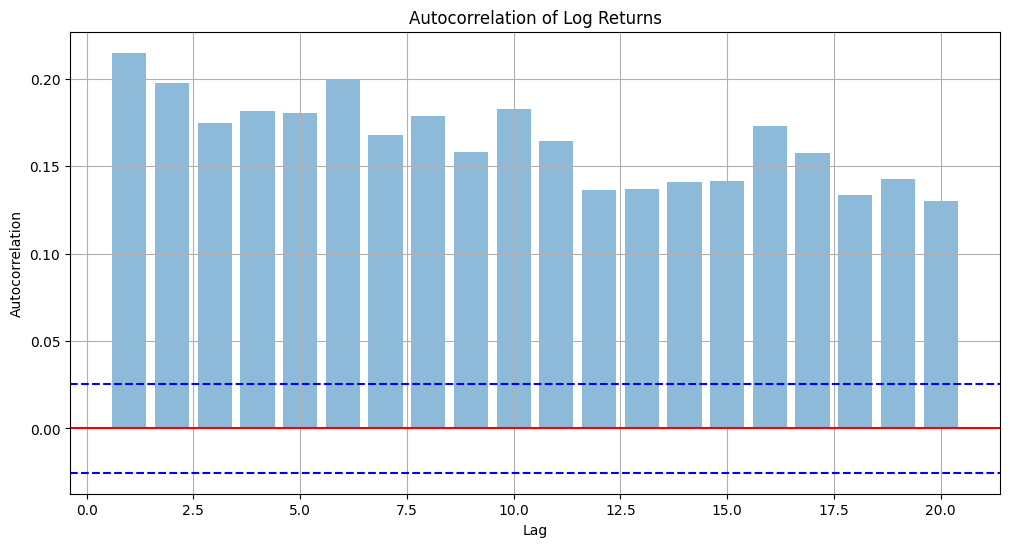

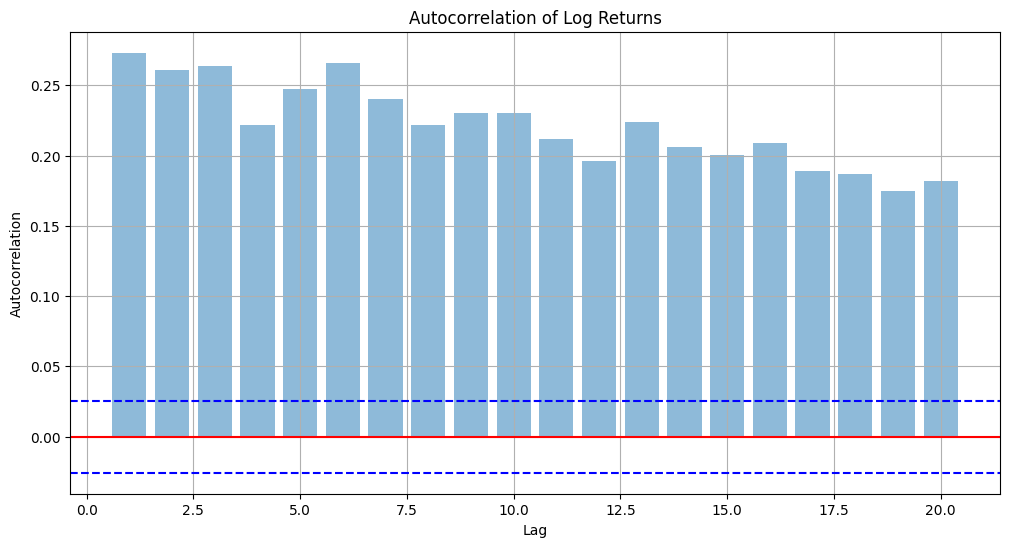

In [44]:
plot_log_returns_autocorrelation(apple_daily, absolute=True)
plot_log_returns_autocorrelation(oil_futures_daily, absolute=True)

Autokorelacija je očito prisutna i slabo opadajuća (ima dugotrajan efekt).

Standardizirajte logaritamske povrate (izračunajte z-score za svaku vrijednost).

In [45]:
def calculate_z_score(df):
    '''
    Calculate z-score for 'Log_Return' column in the DataFrame
    Z-score = (x - mean) / standard deviation
    '''
    mean = df['Log_Return'].mean()
    std = df['Log_Return'].std()
        
    # Calculate z-score and add it as a new column
    df['Z_Score_Log_Return'] = (df['Log_Return'] - mean) / std
    
    return df

In [46]:
apple_daily = calculate_z_score(apple_daily)
oil_futures_daily = calculate_z_score(oil_futures_daily)

In [47]:
apple_daily['Z_Score_Log_Return']

1      -3.461492
2       0.532143
3      -3.556326
4       1.768096
5      -0.723950
          ...   
5989   -0.006284
5990    0.065578
5991   -0.561996
5992   -1.002981
5993    0.275667
Name: Z_Score_Log_Return, Length: 5993, dtype: float64

In [48]:
apple_minutes = calculate_z_score(apple_minutes)
oil_futures_minutes = calculate_z_score(oil_futures_minutes)

In [49]:
apple_minutes.head()

,Unnamed: 0,open,high,low,close,volume,Log_Return,Z_Score_Log_Return
1,2022-04-18 09:31:00-04:00,164.2387,164.6381,163.9691,164.5982,358753.0,0.002369,0.132098
2,2022-04-18 09:32:00-04:00,164.5982,165.0974,164.5482,164.8977,466491.0,0.001818,0.101359
3,2022-04-18 09:33:00-04:00,164.8977,165.3471,164.8079,165.3271,372261.0,0.002601,0.145006
4,2022-04-18 09:34:00-04:00,165.3371,165.3371,164.8877,164.9236,286183.0,-0.002444,-0.136276
5,2022-04-18 09:35:00-04:00,164.9377,165.0974,164.6671,165.0823,392210.0,0.000962,0.053619


Na istom grafu prikažite, tj usporedite histogram standardiziranih povrata i histogram uzorkovane standardne normalne distribucije $\mathcal{N}(0, 1)$. 
Standardnu normalnu distribuciju možete uzorkovati koristeći `numpy` biblioteku, kao `np.random.normal(0, 1, 1000)`.

U `matplotlibu` možete koristiti funkcije `plt.hist` za prikaz histograma, distribucije prikažite različitim bojama, dodajte oznake i legendu, stavite `alpha` parametar na 0.5, `bins` na 1000, a `density` na `True`.

Jesu li ekstremne vrijednosti češće prisutne u standardiziranim povratima dionice Applea ili među vrijednostima standardne normalne distribucije?

Jesu li ekstremne vrijednosti češće prisutne u standardiziranim povratima futures ugovora na sirovu naftu ili među vrijednostima standardne normalne distribucije?


In [50]:
def returns_with_normal_dist(df):
    # Generate normal distribution sample
    normal_sample = np.random.normal(0, 1, len(df))
    
    # Create histogram
    plt.figure(figsize=(12, 6))
    
    # Plot standardized returns histogram
    plt.hist(df['Z_Score_Log_Return'].dropna(), 
            bins=1000, 
            density=True, 
            alpha=0.5, 
            color='blue', 
            label='Standardized Returns')
    
    # Plot normal distribution histogram
    plt.hist(normal_sample, 
            bins=1000, 
            density=True, 
            alpha=0.5, 
            color='red', 
            label='Normal Distribution')
    
    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Comparison of Standardized Returns vs Normal Distribution')
    plt.legend()
    
    # Set x-axis limits
    plt.xlim(-20, 20)
    
    # Show plot
    plt.show()

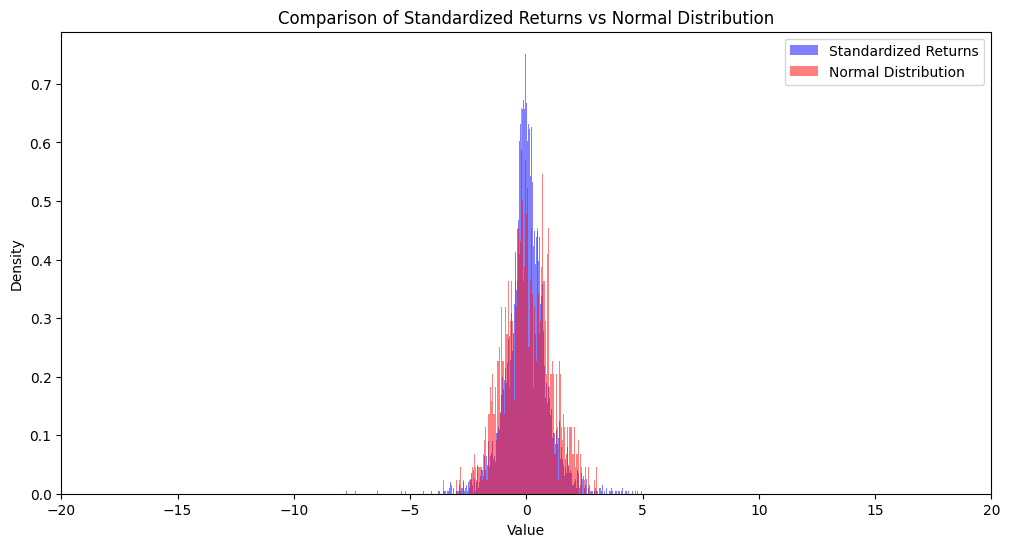

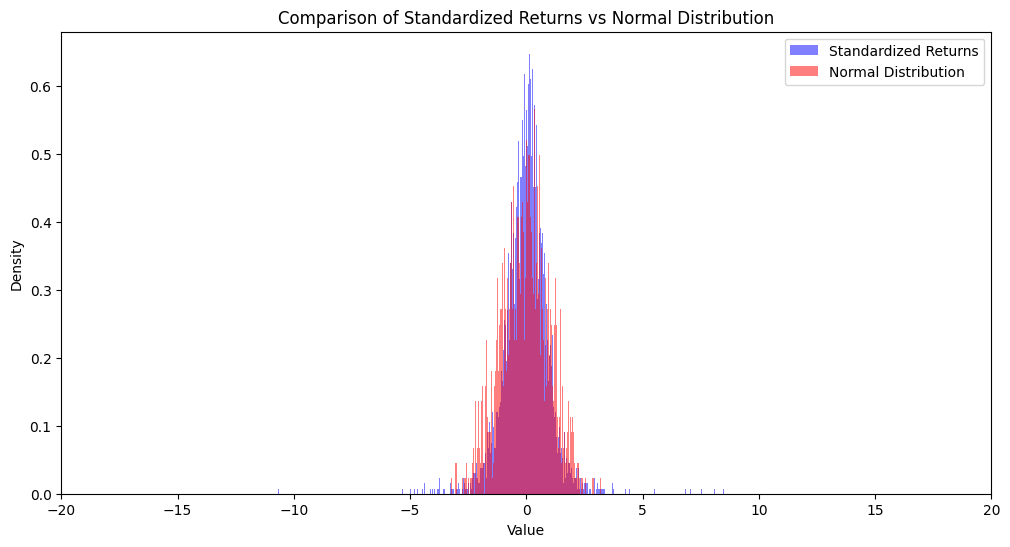

In [51]:
returns_with_normal_dist(apple_daily)
returns_with_normal_dist(oil_futures_daily)

In [52]:
apple_daily['Z_Score_Log_Return'].min(), apple_daily['Z_Score_Log_Return'].max()

(np.float64(-28.49535017697143), np.float64(5.034200778426441))

In [53]:
oil_futures_daily['Z_Score_Log_Return'].min(), oil_futures_daily['Z_Score_Log_Return'].max()

(np.float64(-10.728762342704576), np.float64(12.129613380134188))

Ekstremne vrijednosti su češće prisutne u standardiziranim povratima dionice Applea i povratima futures ugovora na sirovu naftu nego među vrijednostima standardne normalne distribucije. Kod dionice Applea čak vidimo ekstremnu vrijednost udaljenu za 28.5 (manju za 28.5) standardnih devijacija od srednje vrijednosti.

To je pokazatelj na stiliziranu činjenicu da distribucija povrata ima teške repove.

Ponovite postupak za minutne podatke.

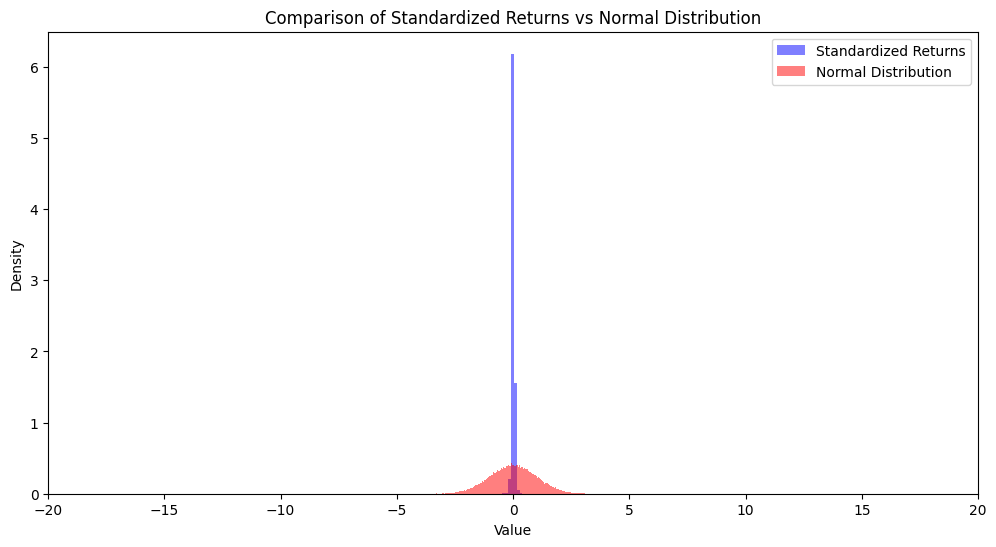

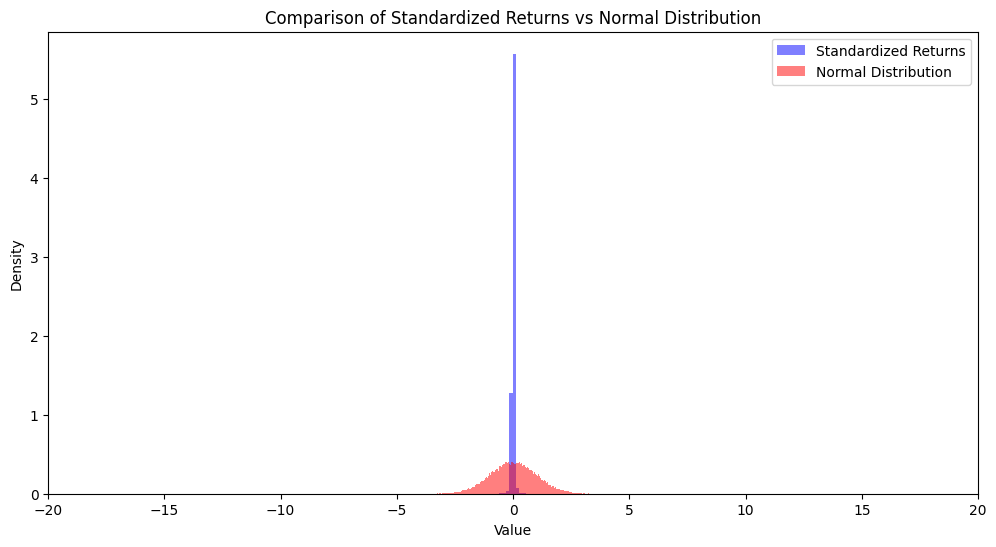

In [54]:
returns_with_normal_dist(apple_minutes)
returns_with_normal_dist(oil_futures_minutes)

In [55]:
apple_minutes['Z_Score_Log_Return'].min(), apple_minutes['Z_Score_Log_Return'].max()

(np.float64(-63.91147819719529), np.float64(60.24150470717487))

In [56]:
oil_futures_minutes['Z_Score_Log_Return'].min(), oil_futures_minutes['Z_Score_Log_Return'].max()

(np.float64(-63.98529134388524), np.float64(78.79298048138621))

Ovdje se to ne vidi jer je vremenski interval u kojem računamo povrat premalen. Unatoč tome, možemo vidjeti da ovdje postoje neki nevjerojatno ekstremni povrati.

## Zadatak 4 - Modeli povrata

<b>ARMA model</b> kombinira autoregresivne (AR) i pokretne prosjeke (MA) komponente za modeliranje vremenskih serija koje su stacionarne. Općenito, ARMA(p,q) model može se zapisati kao:

$$
r_t = \phi_0 + \sum_{i=1}^{p} \phi_i r_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \varepsilon_t
$$

gdje su:
- $ r_t $: logaritamski povrat u trenutku $ t $,
- $ \phi_0 $: konstanta modela,
- $ \phi_i $: koeficijenti autoregresivnog dijela modela (AR) reda $ p $,
- $ \theta_j $: koeficijenti dijela pokretnog prosjeka (MA) reda $ q $,
- $ \varepsilon_t $: bijeli šum, tj. slučajna varijabla s očekivanim iznosom nula i konstantnom varijancom $ \sigma^2 $.


Ipak, jednostavni ARMA modeli često nisu dovoljni za opisivanje promjenjive volatilnosti u financijskim vremenskim serijama, gdje su nestacionarnosti u volatilnosti česte. Kako bismo modelirali tu promjenjivu volatilnost, koristimo <b>GARCH(m, s) model</b>, koji omogućava opisivanje heteroskedastičnosti, tj. promjenjivosti varijance u vremenu.

Model povrata $r_t$ definiramo kao kombinaciju modela očekivanja $\mu$ i modela inovacije $a_t$:

$$
r_t = \mu + a_t, \quad a_t = \sigma_t \varepsilon_t.
$$

Inovacija $a_t$ prati GARCH(m, s) model, ako vrijedi: 

$$
\sigma_t^2 = \alpha_0 + \sum_{i=1}^{m} \alpha_i a_{t-i}^2 + \sum_{j=1}^{s} \beta_j \sigma_{t-j}^2
$$

gdje su:
- $ \alpha_0 $: konstanta modela koja postavlja osnovnu razinu varijance,
- $ \alpha_i $: koeficijenti koji opisuju utjecaj kvadrata prethodnih šokova $ a_{t-i}^2 $ na trenutnu varijancu (ARCH komponenta),
- $ \beta_j $: koeficijenti koji opisuju utjecaj prethodnih uvjetovanih varijanci $ \sigma_{t-j}^2 $ na trenutnu varijancu (GARCH komponenta).


Primijenite dva ARMA modela na dnevne logaritamske povrate dionica Apple-a, i to ARMA(5,5) i ARMA(1,1).

Procijenite parametre oba modela i usporedite modele na temelju metrike kvalitete prilagodbe, tj. $R^2$ vrijednosti. Ispišite parametre i metrike kvalitete prilagodbe.

Za prilagodbu modela koristite funkciju `ARMA` iz biblioteke `statsmodels`.

In [57]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model

In [66]:
# Učitavanje dnevnih podataka za Apple dionicu
apple_daily = pd.read_csv('data/zadatak_4/apple_daily_data.csv')
apple_daily.set_index('Date', inplace=True)
apple_daily.index = pd.DatetimeIndex(apple_daily.index).to_period('D')

# Logaritamski povrati
apple_daily = calculate_log_returns(apple_daily)
apple_daily.head()

/var/folders/nl/w1k6kw552t5cyl185c6p43y80000gn/T/ipykernel_7468/964590144.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  apple_daily.index = pd.DatetimeIndex(apple_daily.index).to_period('D')


,Adj Close,Close,High,Low,Open,Volume,Log_Return
Date,,,,,,,
2000-01-04,0.772846,0.915179,0.987723,0.903460,0.966518,512377600,-0.088077
2000-01-05,0.784155,0.928571,0.987165,0.919643,0.926339,778321600,0.014527
2000-01-06,0.716296,0.848214,0.955357,0.848214,0.947545,767972800,-0.090514
2000-01-07,0.750226,0.888393,0.901786,0.852679,0.861607,460734400,0.046281
2000-01-10,0.737031,0.872768,0.912946,0.845982,0.910714,505064000,-0.017744


In [67]:
# Učitavanje dnevnih podataka za futures ugovore za sirovu naftu
crude_oil_daily = pd.read_csv('data/zadatak_4/crude_oil_daily_data.csv')

# Logaritamski povrati
crude_oil_daily = calculate_log_returns(crude_oil_daily)
crude_oil_daily.head()

/opt/anaconda3/envs/anfin/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,Adj Close,Close,High,Low,Open,Volume,Log_Return
1,2000-08-24 00:00:00+00:00,31.629999,31.629999,32.240002,31.400000,31.900000,72978,-0.013191
2,2000-08-25 00:00:00+00:00,32.049999,32.049999,32.099998,31.320000,31.700001,44601,0.013191
3,2000-08-28 00:00:00+00:00,32.869999,32.869999,32.919998,31.860001,32.040001,46770,0.025263
4,2000-08-29 00:00:00+00:00,32.720001,32.720001,33.029999,32.560001,32.820000,49131,-0.004574
5,2000-08-30 00:00:00+00:00,33.400002,33.400002,33.400002,32.099998,32.750000,79214,0.020569


ARMA(1,1)

In [68]:
arma_1_1 = ARIMA(apple_daily['Log_Return'], order=(1, 0, 1))

results = arma_1_1.fit()

print('\nAll parameters:')
print(results.params)


All parameters:
const     0.000853
ar.L1     0.093246
ma.L1    -0.133236
sigma2    0.000659
dtype: float64


In [70]:
predictions = results.predict()
actual = apple_daily['Log_Return']

r2 = r2_score(actual, predictions)
print(f'R-squared: {r2}')

R-squared: 0.0016330741284462658


ARMA(5,5)

In [71]:
arma_5_5 = ARIMA(apple_daily['Log_Return'], order=(5, 0, 5))

results = arma_5_5.fit()

print('\nAll parameters:')
print(results.params)

/opt/anaconda3/envs/anfin/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



All parameters:
const     0.000321
ar.L1     0.082271
ar.L2     0.257464
ar.L3    -0.427886
ar.L4    -0.719524
ar.L5     0.165879
ma.L1    -0.108518
ma.L2    -0.212814
ma.L3     0.415778
ma.L4     0.703958
ma.L5    -0.139257
sigma2    0.000662
dtype: float64


In [72]:
predictions = results.predict()
actual = apple_daily['Log_Return']

r2 = r2_score(actual, predictions)
print(f'R-squared: {r2}')

R-squared: -0.0040020100153532745


Autokorelacijska funkcija (ACF) mjeri povezanost između trenutne vrijednosti vremenskog niza (logaritamskih povrata) i njegovih prošlih vrijednosti, definirana za različita kašnjenja (lagove). ACF se koristi za određivanje reda pokretnog prosjeka $ q $ komponente u ARMA modelu, jer se u MA modelima značajna autokorelacija pojavljuje za red $ q $, dok vrijednosti nakon toga opadaju prema nuli.

Parcijalna autokorelacijska funkcija (PACF) mjeri specifičnu povezanost trenutne vrijednosti vremenskog niza s određenim kašnjenjem, uklanjajući utjecaj međupovezanih kašnjenja. PACF stacionarnog vremenskog niza jest funkcija njegove autokorelacijske funkcije (ACF) i koristan je alat za određivanje reda $ p $ autoregresivnog (AR) modela. U AR modelu red $ p $ određen je brojem značajnih kašnjenja u PACF-u, nakon čega PACF opada prema nuli.

Jednostavan, ali učinkovit način za uvođenje PACF-a je razmatranje sljedećih AR modela uzastopnih redova:

$$
r_t = \phi_{0,1} + \phi_{1,1} r_{t-1} + e_{1t},
$$

$$
r_t = \phi_{0,2} + \phi_{1,2} r_{t-1} + \phi_{2,2} r_{t-2} + e_{2t},
$$

$$
r_t = \phi_{0,3} + \phi_{1,3} r_{t-1} + \phi_{2,3} r_{t-2} + \phi_{3,3} r_{t-3} + e_{3t},
$$

$$
r_t = \phi_{0,4} + \phi_{1,4} r_{t-1} + \phi_{2,4} r_{t-2} + \phi_{3,4} r_{t-3} + \phi_{4,4} r_{t-4} + e_{4t},
$$

$$
\vdots
$$

gdje su $ \phi_{0,j} $, $ \phi_{i,j} $, i $ \{ e_{jt} \} $ redom konstanta, koeficijent $ r_{t-i} $, i pogreška u AR($ j $) modelu. Više detalja o PACF-u možete pronaći u knjzi Ruey S. Tsay, Analysis of Financial Time Series (2005), potpoglavlje  2.4.

Prikažite ACF i PACF za dnevne podatke povrata dionica Applea koristeći `plot_acf` i `plot_pacf` iz biblioteke `statsmodels`. Postavite parametar `lags` na 20 kako biste prikazali prvih 20 kašnjenja, te parametar `zero` na `False` kako biste izostavili autokorelaciju nultog reda.

Na temelju prikaza ACF i PACF grafova, odaberite prikladne parametre za ARMA model, definirajući redove autoregresivne ($ p $) i pokretne prosječne ($ q $) komponente.

Prilagodite ARMA model na povrate dionica Appleas tako odabranim $ p $ i $ q $. Ispišite i usporedite metriku kvalitete prilagodbe $ R^2 $ s modelima iz prethodnog zadatka: ARMA(5,5) i ARMA(1,1).


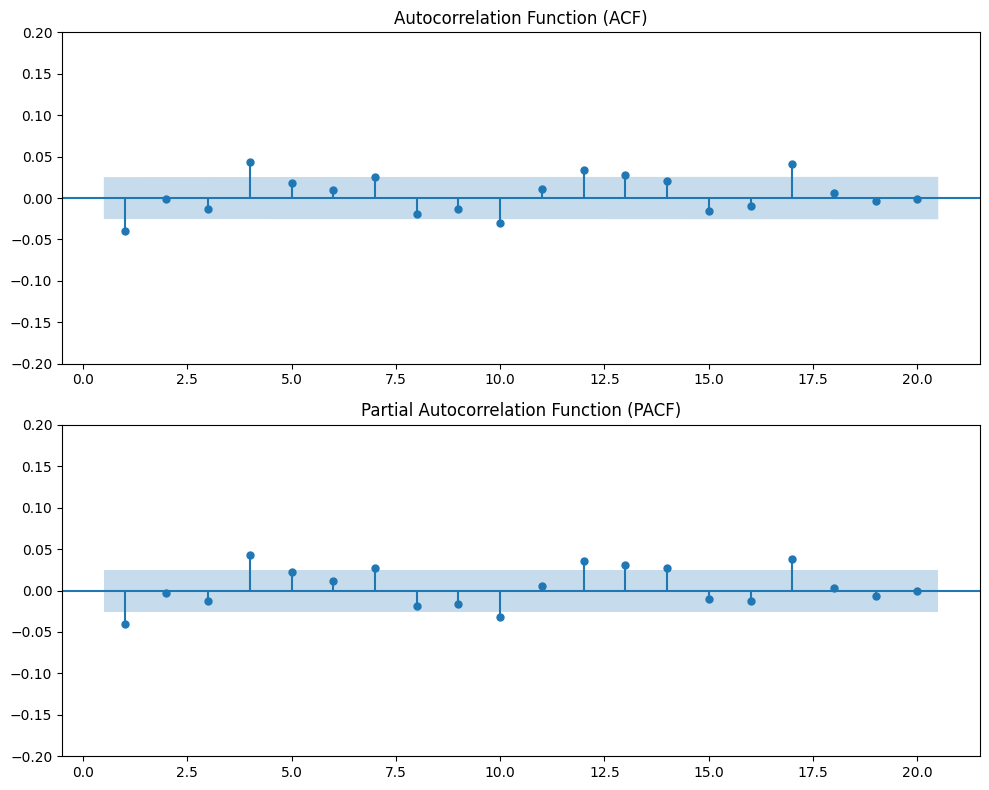

In [73]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot ACF
plot_acf(apple_daily['Log_Return'], lags=20, zero=False, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')
ax1.set_ylim(-0.2, 0.2)  # Set y-axis limits for ACF plot

# Plot PACF
plot_pacf(apple_daily['Log_Return'], lags=20, zero=False, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')
ax2.set_ylim(-0.2, 0.2)  # Set y-axis limits for PACF plot

plt.tight_layout()
plt.show()

In [74]:
arma_4_4 = ARIMA(apple_daily['Log_Return'], order=(4, 0, 4))

results = arma_4_4.fit()

print('\nAll parameters:')
print(results.params)

predictions = results.predict()
actual = apple_daily['Log_Return']

r2 = r2_score(actual, predictions)
print(f'R-squared: {r2}')

/opt/anaconda3/envs/anfin/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



All parameters:
const     0.000840
ar.L1     0.191383
ar.L2     0.536651
ar.L3    -0.074908
ar.L4    -0.606294
ma.L1    -0.222750
ma.L2    -0.516170
ma.L3     0.077088
ma.L4     0.640843
sigma2    0.000655
dtype: float64
R-squared: 0.00598852154365459


In [75]:
arma_17_17 = ARIMA(apple_daily['Log_Return'], order=(17, 0, 17))

results = arma_17_17.fit()

print('\nAll parameters:')
print(results.params)

predictions = results.predict()
actual = apple_daily['Log_Return']

r2 = r2_score(actual, predictions)
print(f'R-squared: {r2}')

/opt/anaconda3/envs/anfin/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



All parameters:
const     0.000834
ar.L1     0.158187
ar.L2     0.394815
ar.L3    -0.394012
ar.L4    -0.205400
ar.L5    -0.210978
ar.L6     0.020892
ar.L7    -0.246356
ar.L8    -0.079679
ar.L9     0.128914
ar.L10   -0.278818
ar.L11   -0.080885
ar.L12   -0.135319
ar.L13    0.199749
ar.L14   -0.156359
ar.L15   -0.131483
ar.L16    0.033295
ar.L17   -0.040573
ma.L1    -0.202281
ma.L2    -0.388764
ma.L3     0.401392
ma.L4     0.237948
ma.L5     0.216607
ma.L6    -0.044482
ma.L7     0.279908
ma.L8     0.055526
ma.L9    -0.135356
ma.L10    0.279049
ma.L11    0.102981
ma.L12    0.182643
ma.L13   -0.217269
ma.L14    0.179191
ma.L15    0.113007
ma.L16   -0.026106
ma.L17    0.112220
sigma2    0.000650
dtype: float64
R-squared: 0.014589402496255288


/opt/anaconda3/envs/anfin/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


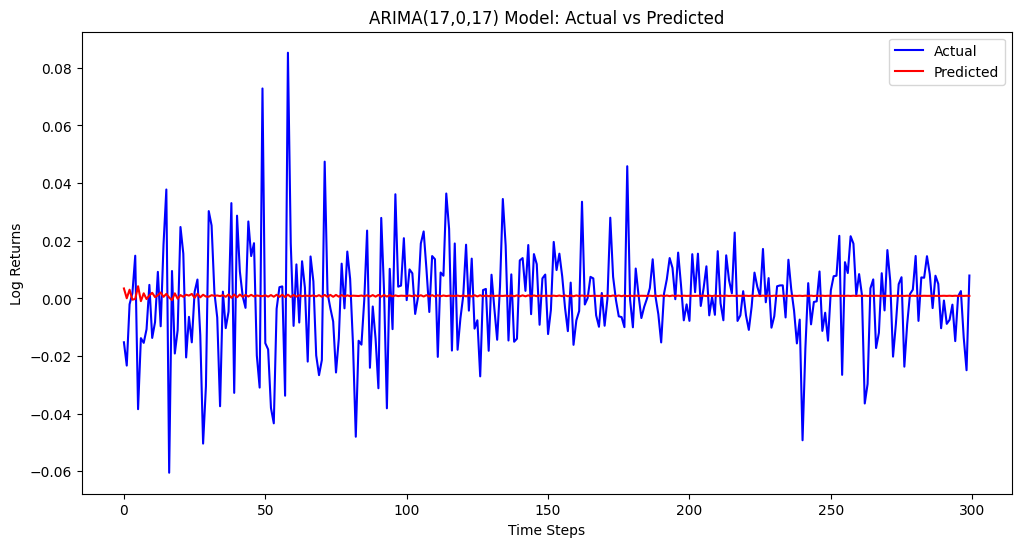

In [76]:
# Let's split the data into train and test sets (95-05 split)
train_size = int(len(apple_daily['Log_Return']) * 0.95)
train_data = apple_daily['Log_Return'][:train_size]
test_data = apple_daily['Log_Return'][train_size:]

# Fit ARIMA model
arma_17_17 = ARIMA(train_data, order=(17,0,17))
model_fit = arma_17_17.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Plot results
plt.figure(figsize=(12,6))
plt.plot(test_data.values, label='Actual', color='blue')
plt.plot(predictions.values, label='Predicted', color='red')  # convert predictions to values
plt.title('ARIMA(17,0,17) Model: Actual vs Predicted')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Log Returns')
plt.show()

Procijenite GARCH(1,1) model za dnevne logaritamske povrate futures ugovora na sirovu naftu. 

Ako se volatilnost može modelirati GARCH(1,1) modelom, tada bi serija $\tilde{a_t}$ trebala biti nekorelirana, odnosno trebala bi se ponašati kao bijeli šum. Ipak, ako primijetimo značajne autokorelacije u $\tilde{a_t}$, to može sugerirati da GARCH(1,1) model nije u potpunosti uspio opisati obrasce u volatilnosti. 

Standardizirani reziduali $ \tilde{a}_t $ predstavljaju normaliziranu verziju inovacija u modelu. Definirani su kao:

$$
\tilde{a}_t = \frac{a_t}{\sigma_t},
$$

gdje je $ a_t $ stvarna vrijednost inovacije, a $ \sigma_t $ procijenjena uvjetovana standardna devijacija. Ako su standardizirani reziduali modelirani uspješno, oni bi trebali imati očekivanu srednju vrijednost od nula i standardnu devijaciju od jedan, te biti serijski nekorelirani.

Vizualizirajte autokorelaciju i standardizirane reziduale od $\tilde{a}_t$ za oba modela. 


GARCH(1,1) Model Parameters:
mu          0.000678
omega       0.000014
alpha[1]    0.100000
beta[1]     0.879998
Name: params, dtype: float64


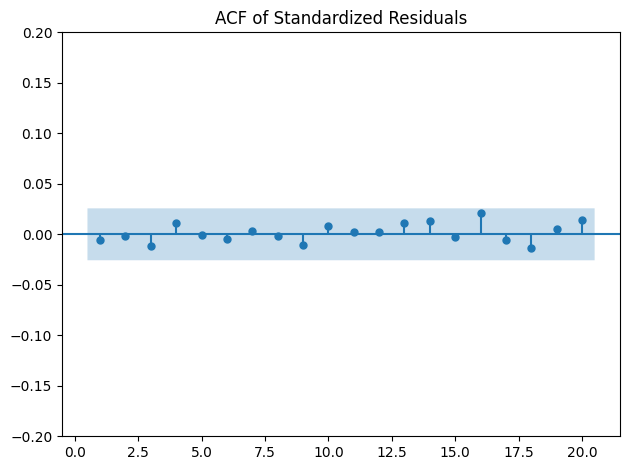

Mean: -0.0253
Standard Deviation: 0.9932


In [77]:
# GARCH(1,1) model
garch_1_1 = arch_model(crude_oil_daily['Log_Return'], vol='Garch', p=1, q=1, mean='Constant', rescale=False)
results = garch_1_1.fit(disp='off')

# Print model parameters
print('\nGARCH(1,1) Model Parameters:')
print(results.params)

# Get standardized residuals
standardized_residuals = results.resid / results.conditional_volatility

# Plot ACF of standardized residuals
plot_acf(standardized_residuals, lags=20, zero=False)
plt.title('ACF of Standardized Residuals')
plt.ylim(-0.2, 0.2)
plt.tight_layout()
plt.show()

print(f'Mean: {np.mean(standardized_residuals):.4f}')
print(f'Standard Deviation: {np.std(standardized_residuals):.4f}')


GARCH(3,3) Model Parameters:
mu          0.000627
omega       0.000014
alpha[1]    0.066667
alpha[2]    0.066667
alpha[3]    0.066667
beta[1]     0.260000
beta[2]     0.260000
beta[3]     0.260000
Name: params, dtype: float64


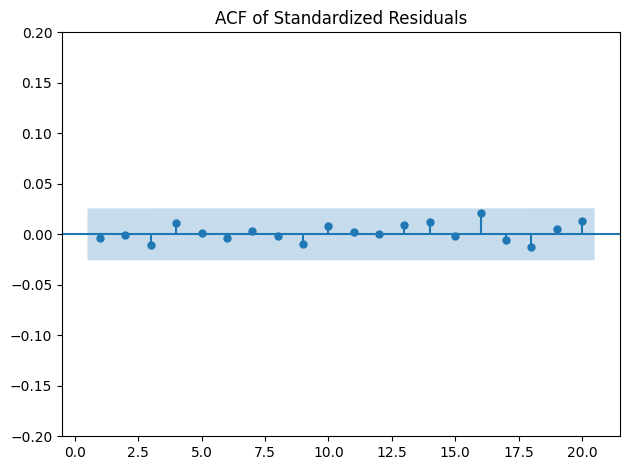

Mean: -0.0248
Standard Deviation: 1.0256


In [78]:
# GARCH(3,3) model
garch_3_3 = arch_model(crude_oil_daily['Log_Return'], vol='Garch', p=3, q=3, mean='Constant', rescale=False)
results = garch_3_3.fit(disp='off')

# Print model parameters
print('\nGARCH(3,3) Model Parameters:')
print(results.params)

# Get standardized residuals
standardized_residuals = results.resid / results.conditional_volatility

# Plot ACF of standardized residuals
plot_acf(standardized_residuals, lags=20, zero=False)
plt.title('ACF of Standardized Residuals')
plt.ylim(-0.2, 0.2)
plt.tight_layout()
plt.show()

print(f'Mean: {np.mean(standardized_residuals):.4f}')
print(f'Standard Deviation: {np.std(standardized_residuals):.4f}')

Iskoristitie prethodno prilagođen (vaš) ARMA model kao model sredine $\mu_t$ u GARCH(1,1) modelu za logaritamske povrate dionica Applea.

Usporedite tako dobiveni model (autokorelaciju i standardizirane reziduale) s modelima iz prethodnog zadatka.

/opt/anaconda3/envs/anfin/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



ARMA(4,4) - GARCH(1,1) Model Parameters:
omega       0.000013
alpha[1]    0.100000
beta[1]     0.880000
Name: params, dtype: float64


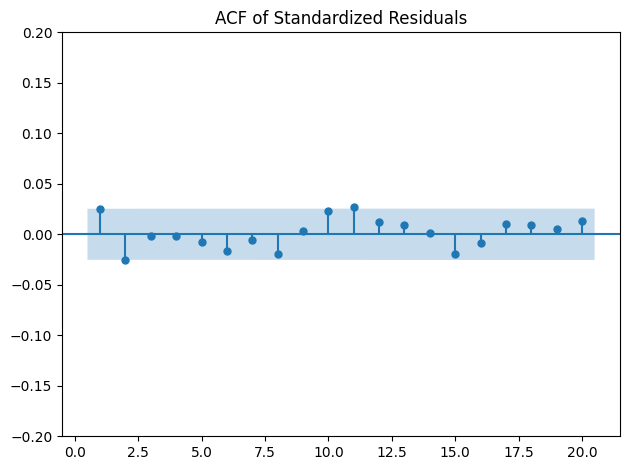

Mean: 0.0120
Standard Deviation: 1.0018


In [79]:
# ARMA(4,4) - GARCH(1,1) model
arma_4_4 = ARIMA(apple_daily['Log_Return'].dropna(), order=(4, 0, 4))
arma_results = arma_4_4.fit()
arma_residuals = arma_results.resid

garch_1_1 = arch_model(arma_residuals, vol='Garch', p=1, q=1, mean='Zero', rescale=False)
garch_results = garch_1_1.fit(disp='off')

print('\nARMA(4,4) - GARCH(1,1) Model Parameters:')
print(garch_results.params)

# Get standardized residuals
standardized_residuals = garch_results.resid / garch_results.conditional_volatility

# Plot ACF of standardized residuals
plot_acf(standardized_residuals, lags=20, zero=False)
plt.title('ACF of Standardized Residuals')
plt.ylim(-0.2, 0.2)
plt.tight_layout()
plt.show()

print(f'Mean: {np.mean(standardized_residuals):.4f}')
print(f'Standard Deviation: {np.std(standardized_residuals):.4f}')

## Zadatak 5 - Faktorski modeli

Prvi model od interesa je jednofaktorski model povrata, koji koristi povrat tržišta kao faktor koji utječe na sve vrijednosnice: 

$$
r_{it} = \alpha_i + \beta_i r_{Mt} + \varepsilon_{it}
$$

gdje je $r_{it}$ povrat vrijednosnice $i$ iznad bezrizične kamatne stope (excess return), a $r_{Mt}$ povrat tržišta iznad bezrizične kamatne stope.



U mapi zadatak_5 nalaze se povijesne cijene dionica za sljedeće sektore:

- AAPL (Apple Inc.)
- TSLA (Tesla, Inc.)
- JNJ (Johnson & Johnson)
- LLY (Eli Lilly and Company)
- MRK (Merck & Co., Inc.)

Također, u mapi zadatak_5 nalazi se datoteka `sp500.csv`, koja sadrži povijesne cijene tržišnog indeksa S&P 500, te prinos tromjesečnog trezorskog zapisa (treasury bill) `tb3ms_data.csv`.

Učitajte podatke o povijesnim cijenama za sve dionice i tržišni indeks te izračunajte dnevne logaritamske povrate.


In [80]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [81]:
def calculate_log_returns(data, price_column='Close'):
    data['Log_Return'] = np.log(data[price_column] / data[price_column].shift(1))
    return data.dropna()

In [82]:
AAPL_df = calculate_log_returns(pd.read_csv('data/zadatak_5/apple_daily_data.csv'))
TSLA_df = calculate_log_returns(pd.read_csv('data/zadatak_5/tesla_daily_data.csv'))
JNJ_df = calculate_log_returns(pd.read_csv('data/zadatak_5/j_and_j_daily_data.csv'))
LLY_df = calculate_log_returns(pd.read_csv('data/zadatak_5/lly_daily_data.csv'))
MRK_df = calculate_log_returns(pd.read_csv('data/zadatak_5/mrk_daily_data.csv'))
SP500_df = calculate_log_returns(pd.read_csv('data/zadatak_5/sp500_daily_data.csv'))

AAPL_df['Date'] = pd.to_datetime(AAPL_df['Date']).dt.date
TSLA_df['Date'] = pd.to_datetime(TSLA_df['Date']).dt.date
JNJ_df['Date'] = pd.to_datetime(JNJ_df['Date']).dt.date
LLY_df['Date'] = pd.to_datetime(LLY_df['Date']).dt.date
MRK_df['Date'] = pd.to_datetime(MRK_df['Date']).dt.date
SP500_df['Date'] = pd.to_datetime(SP500_df['Date']).dt.date

In [83]:
AAPL_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Log_Return
1,2000-01-04,0.772846,0.915179,0.987723,0.903460,0.966518,512377600,-0.088077
2,2000-01-05,0.784155,0.928571,0.987165,0.919643,0.926339,778321600,0.014527
3,2000-01-06,0.716296,0.848214,0.955357,0.848214,0.947545,767972800,-0.090514
4,2000-01-07,0.750226,0.888393,0.901786,0.852679,0.861607,460734400,0.046281
5,2000-01-10,0.737031,0.872768,0.912946,0.845982,0.910714,505064000,-0.017744


Učitajte mjesečnu godišnju stopu tromjesečnog trezorskog zapisa iz datoteke `tb3ms_data.csv`

Konvertirajte godišnju stopu u dnevnu stopu koristeći pretpostavku od 252 dana trgovanja godišnje.

Prilagodite povrate pojedinih dionica te tržišnog indeksa oduzimanjem dnevne bezrizične stope za svaki dan (excess returns).

In [84]:
t_bill_df = pd.read_csv('data/zadatak_5/tb3ms_data.csv')
t_bill_df.rename(columns={'DATE': 'Date'}, inplace=True)
t_bill_df.tail()

,Date,VALUE
1085,2024-06-01,5.24
1086,2024-07-01,5.20
1087,2024-08-01,5.05
1088,2024-09-01,4.72
1089,2024-10-01,4.51


In [85]:
t_bill_df['VALUE_DAY'] = (1 + t_bill_df['VALUE']) ** (1 / 252) - 1
t_bill_df.tail()

,Date,VALUE,VALUE_DAY
1085,2024-06-01,5.24,0.007292
1086,2024-07-01,5.20,0.007267
1087,2024-08-01,5.05,0.007169
1088,2024-09-01,4.72,0.006945
1089,2024-10-01,4.51,0.006795


In [86]:
# Excess_Return = ln(R) - ln(1 + rf) 

def calculate_excess_returns(df1, df2, log_return_col='Log_Return', rf_col='VALUE_DAY', date_col='Date'):

    # Function to find closest previous date
    def get_prev_rf(date):
        mask = df2[date_col] <= date
        if mask.any():
            return df2[mask][rf_col].iloc[-1]
        return None

    # Ensure dates are datetime
    df1[date_col] = pd.to_datetime(df1[date_col])
    df2[date_col] = pd.to_datetime(df2[date_col])
    
    # Get risk-free rate for each date
    rf_rates = df1[date_col].map(get_prev_rf)
    
    # Calculate excess returns (log return - log(1 + rf))
    df1['Log_Excess_Return'] = df1[log_return_col] - np.log(1 + rf_rates/100)
    
    return df1

In [87]:
AAPL_df = calculate_excess_returns(AAPL_df, t_bill_df)
TSLA_df = calculate_excess_returns(TSLA_df, t_bill_df)
JNJ_df = calculate_excess_returns(JNJ_df, t_bill_df)
LLY_df = calculate_excess_returns(LLY_df, t_bill_df)
MRK_df = calculate_excess_returns(MRK_df, t_bill_df)
SP500_df = calculate_excess_returns(SP500_df, t_bill_df)

In [88]:
AAPL_df.tail()

,Date,Adj Close,Close,High,Low,Open,Volume,Log_Return,Log_Excess_Return
5989,2023-10-23,172.119247,173.000000,174.009995,169.929993,170.910004,55980100,0.000694,0.000620
5990,2023-10-24,172.556992,173.440002,173.669998,171.449997,173.050003,43816600,0.002540,0.002467
5991,2023-10-25,170.228912,171.100006,173.059998,170.649994,171.880005,57157000,-0.013584,-0.013657
5992,2023-10-26,166.040344,166.889999,171.380005,165.669998,170.369995,70625300,-0.024913,-0.024987
5993,2023-10-27,167.363571,168.220001,168.960007,166.830002,166.910004,58499100,0.007938,0.007864


Primijenite regresiju za svaku dionicu koristeći povrate dionica kao zavisne varijable i povrate tržišnog indeksa kao nezavisnu varijablu.

Ispišite i vizualizirajte koeficijente $\alpha$ i $\beta$ za svaku dionicu.

In [89]:
# Create lists to store results
alphas = []
betas = []
tickers = ['AAPL', 'TSLA', 'JNJ', 'LLY', 'MRK']  # Adjust based on your dataframes

# Perform regression for each stock
for i, ticker_df in enumerate([AAPL_df, TSLA_df, JNJ_df, LLY_df, MRK_df]):  # Adjust based on your dataframes

    # Merge the stock and SP500 data on Date
    merged_df = pd.merge(SP500_df, ticker_df, on='Date', how='inner')
    
    X = merged_df['Log_Excess_Return_x'].values.reshape(-1, 1)
    y = merged_df['Log_Excess_Return_y'].values
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store coefficients
    alphas.append(model.intercept_)
    betas.append(model.coef_[0])

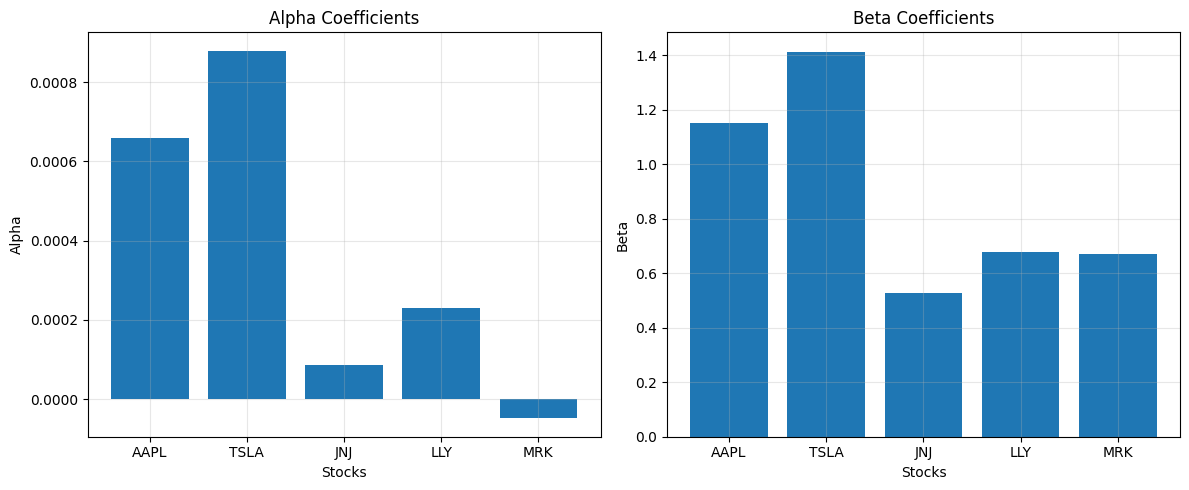


Regression Coefficients:
  Stock     Alpha      Beta
0  AAPL  0.000660  1.152344
1  TSLA  0.000879  1.413616
2   JNJ  0.000086  0.527525
3   LLY  0.000231  0.677987
4   MRK -0.000048  0.670566


In [90]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot alphas
ax1.bar(tickers, alphas)
ax1.set_title('Alpha Coefficients')
ax1.set_xlabel('Stocks')
ax1.set_ylabel('Alpha')
ax1.grid(True, alpha=0.3)

# Plot betas
ax2.bar(tickers, betas)
ax2.set_title('Beta Coefficients')
ax2.set_xlabel('Stocks')
ax2.set_ylabel('Beta')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the coefficients
results_df = pd.DataFrame({
    'Stock': tickers,
    'Alpha': alphas,
    'Beta': betas
})
print('\nRegression Coefficients:')
print(results_df)

Drugi model od interesa je industrijski faktor model inspiriran BARRA pristupom za analizu dionica.

Na temelju industrijske klasifikacije, možemo definirati dvije šire industrijske skupine za pet dionica:

- Tech sektor
    - AAPL (Apple Inc.)
    - TSLA (Tesla, Inc.)
- Zdravstveni sektor
    - JNJ (Johnson & Johnson)
    - LLY (Eli Lilly and Company)
    - MKR (Merck & Co., Inc.)

U skladu s BARRA pristupom, svaka od ovih skupina predstavlja zajednički faktor.

Industrijski faktor model možemo predstaviti kao:

$$
r_{it} = \beta_{i1} f_{1t} + \beta_{i2} f_{2t} + \varepsilon_{it}
$$  

gdje:

- $r_{it}$ predstavlja višak povrata dionice $i$ u trenutku $t$,
- $f_{1t}$ i $f_{2t}$ su povrati zajedničkih faktora za sektore Tech i Zdravstvo,
- $\beta_{i1}$ i $\beta_{i2}$ su indikatori koji pokazuju pripada li dionica $i$ sektoru 1 (Tech) ili sektoru 2 (Zdravstvo).

U tablici niže prikazana je binarna matrica beta vrijednosti za svaku dionicu i industrijsku skupinu:
<table>
<tr>
<th>Dionica</th>
<th>Tech faktor (f1)</th>
<th>Zdravstvo(f2)</th>
</tr>
<tr>
<td>AAPL (Tech)</td>
<td>1</td>
<td>0</td>  
</tr>
<tr>
<td>TSLA (Tech)</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>LLY (Zdravstvo)</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>JNJ (Zdravstvo)</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>MRK (Zdravstvo)</td>
<td>0</td>
<td>1</td>
</tr>
</table>

Vaš je zadatak prilagoditi industrijski faktor model inspiriran BARRA pristupom koji koristi sektorske faktore za analizu povrata dionica prateći postupak s predavanja (OLS i GLS). Detalje o postupku možete pronaći i u knjizi Ruey S. Tsay, Analysis of Financial Time Series (2005), potpoglavlje 9.3.

In [91]:
def barra_estimation(returns, betas):
    '''
    BARRA two-step estimation procedure
    
    Parameters:
    returns: numpy array of asset returns (T x N)
    betas: numpy array of factor loadings (N x K)
    '''
    T, N = returns.shape
    K = betas.shape[1]
    
    # 1. OLS STEP
    # Initial factor estimation (OLS, ignoring Psi)
    F_ols = np.zeros((T, K))
    for t in range(T):
        F_ols[t] = np.linalg.lstsq(betas, returns[t], rcond=None)[0]
    
    # Calculate residuals
    epsilon_ols = returns - F_ols @ betas.T
    
    # Basic Psi estimation (diagonal matrix of residual variances)
    Psi_0 = np.diag(np.var(epsilon_ols, axis=0))
    
    # 2. GLS STEP
    # Calculate GLS factor estimates using Psi_0
    W = np.linalg.inv(Psi_0)  # weights for WLS
    F_gls = np.zeros((T, K))
    
    for t in range(T):
        F_gls[t] = np.linalg.inv(betas.T @ W @ betas) @ betas.T @ W @ returns[t]
    
    # Final residuals and their covariance
    epsilon_gls = returns - F_gls @ betas.T
    Psi_final = np.diag(np.var(epsilon_gls, axis=0))
    
    return F_gls, Psi_final

In [92]:
dfs = [AAPL_df, TSLA_df, JNJ_df, LLY_df, MRK_df]

# Find common dates
date_sets = [set(df['Date']) for df in dfs]
common_dates = set.intersection(*date_sets)
common_dates = sorted(list(common_dates))

# Create merged dataframe only for common dates
merged_df = pd.concat([
    AAPL_df[AAPL_df['Date'].isin(common_dates)].set_index('Date')['Log_Excess_Return'].rename('Log_Excess_Return_AAPL'),
    TSLA_df[TSLA_df['Date'].isin(common_dates)].set_index('Date')['Log_Excess_Return'].rename('Log_Excess_Return_TSLA'),
    JNJ_df[JNJ_df['Date'].isin(common_dates)].set_index('Date')['Log_Excess_Return'].rename('Log_Excess_Return_JNJ'),
    LLY_df[LLY_df['Date'].isin(common_dates)].set_index('Date')['Log_Excess_Return'].rename('Log_Excess_Return_LLY'),
    MRK_df[MRK_df['Date'].isin(common_dates)].set_index('Date')['Log_Excess_Return'].rename('Log_Excess_Return_MRK')
], axis=1)

merged_df.head()

,Log_Excess_Return_AAPL,Log_Excess_Return_TSLA,Log_Excess_Return_JNJ,Log_Excess_Return_LLY,Log_Excess_Return_MRK
Date,,,,,
2010-06-30,-0.018284,-0.002519,-0.003048,-0.007439,-0.013073
2010-07-01,-0.012206,-0.081729,0.000163,-0.011414,-0.015278
2010-07-02,-0.006223,-0.134318,0.000163,0.016464,-0.006414
2010-07-06,0.006815,-0.175476,-0.000006,0.007097,0.012482
2010-07-07,0.039581,-0.019436,0.025562,0.021870,0.022255


In [93]:
betas = np.array([
    [1, 0],
    [1, 0],
    [0, 1],
    [0, 1],
    [0, 1]
])


F, Psi = barra_estimation(merged_df.values, betas)

Ispišite srednju vrijednost i standardnu devijaciju GLS reziduala

In [94]:
GLS_res_mean = np.mean(np.diagonal(Psi))
GLS_res_stddev = np.std(np.diagonal(Psi))

print('Mean of GLS residuals:', GLS_res_mean)
print('Standard deviation of GLS residuals:', GLS_res_stddev)

Mean of GLS residuals: 0.00014966315958823317
Standard deviation of GLS residuals: 0.00011141069113860776


Koristeći prilagođeni industrijski faktorski model, izračunajte korelacije povrata dionica unutar istih sektora (Tech i Zdravstvo) temeljene na modelu. 

Usporedite te korelacije s uzoračkim korelacijama (tj. korelacijama temeljenim na sirovim povratima bez prilagodbi za sektorske faktore).

In [95]:
fact_model_returns = F @ betas.T + np.diagonal(Psi)

merged_df_factor_model = pd.DataFrame(fact_model_returns, columns=merged_df.columns, index=merged_df.index)
merged_df_factor_model.head()

,Log_Excess_Return_AAPL,Log_Excess_Return_TSLA,Log_Excess_Return_JNJ,Log_Excess_Return_LLY,Log_Excess_Return_MRK
Date,,,,,
2010-06-30,-0.010117,-0.010117,-0.007576,-0.007523,-0.007563
2010-07-01,-0.046683,-0.046683,-0.008072,-0.008018,-0.008058
2010-07-02,-0.069986,-0.069986,0.002144,0.002197,0.002157
2010-07-06,-0.084046,-0.084046,0.006140,0.006193,0.006153
2010-07-07,0.010357,0.010357,0.023516,0.023569,0.023529


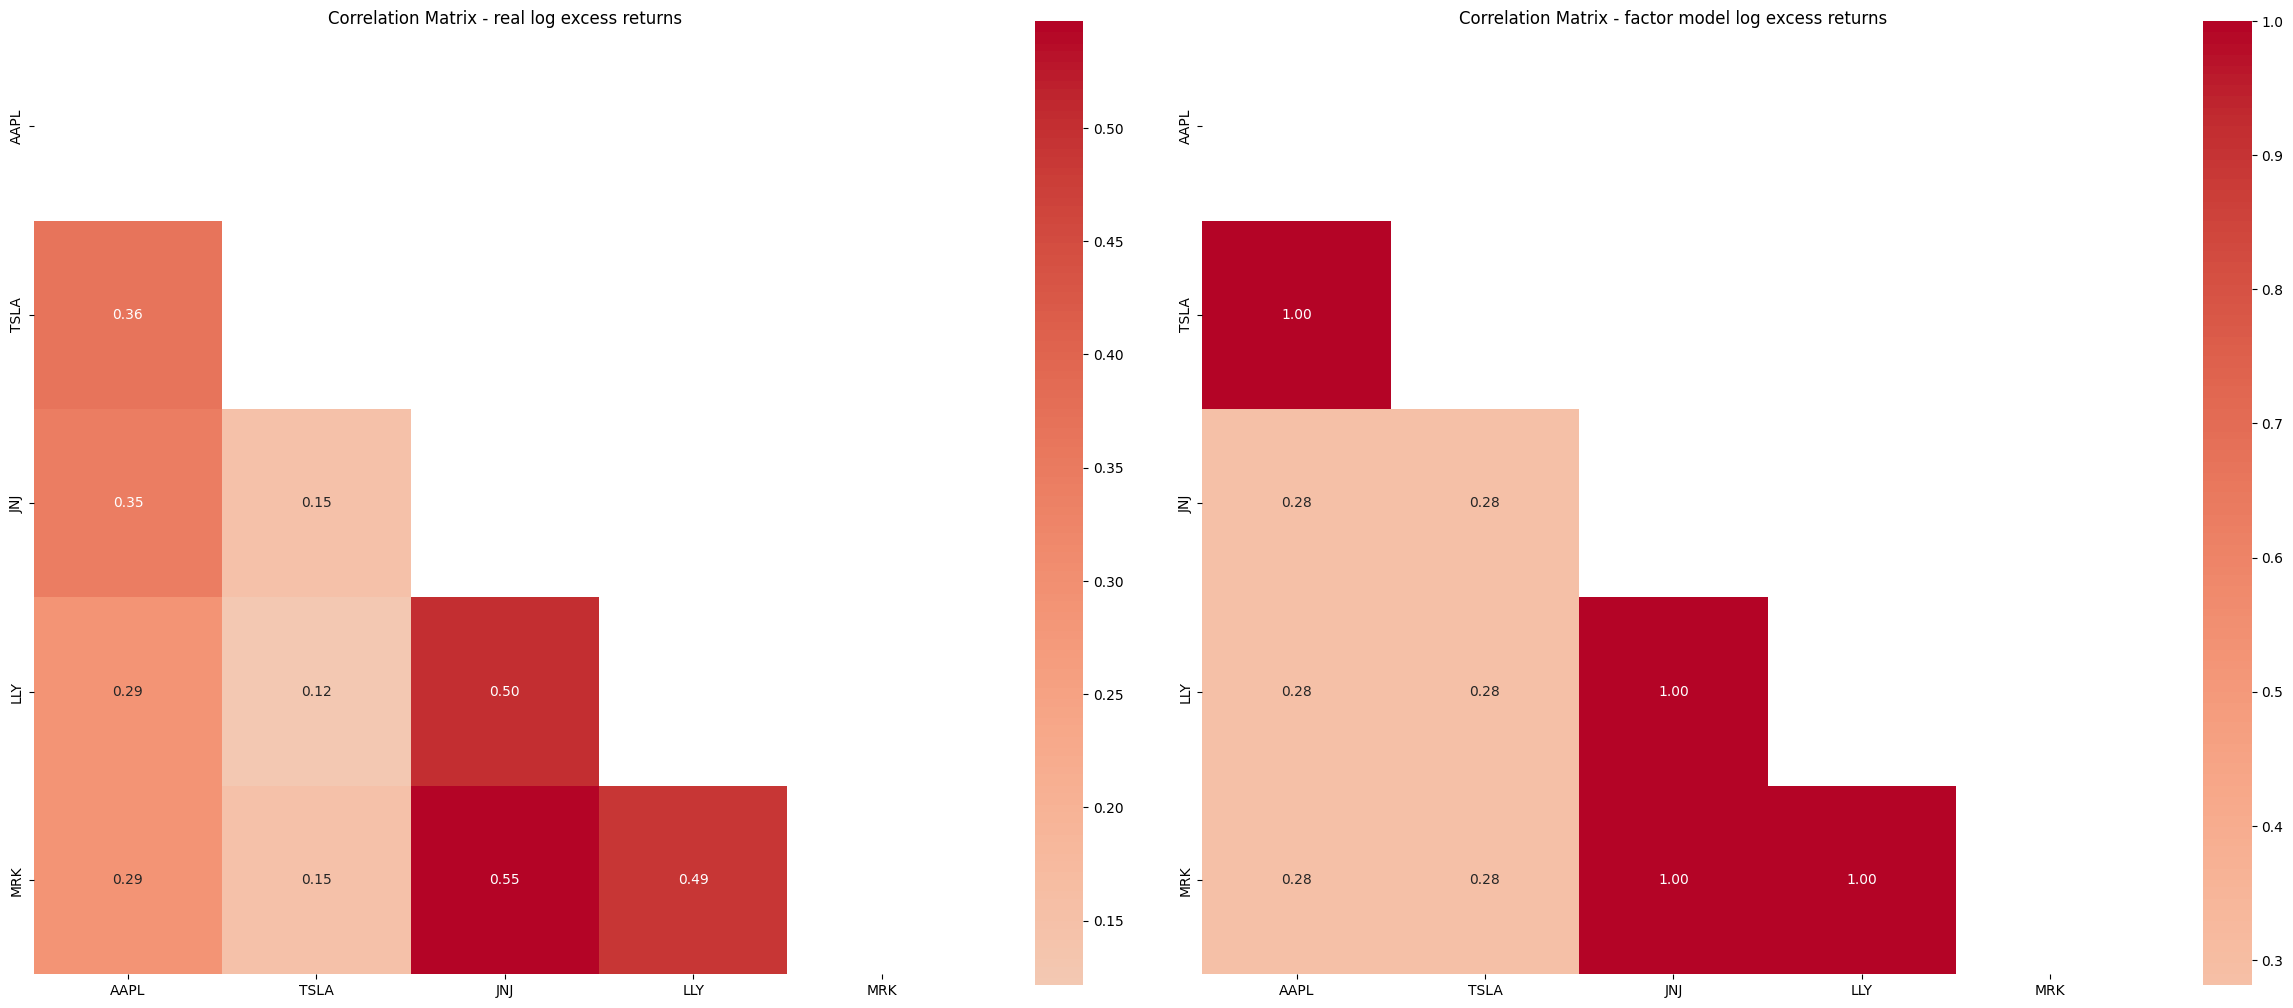

In [96]:
# Calculate correlations
corr_real = merged_df.corr()
corr_fm = merged_df_factor_model.corr()

# Create simplified labels (text after last '_')
simplified_labels_merged = [col.split('_')[-1] for col in corr_real.columns]
simplified_labels_factor = [col.split('_')[-1] for col in corr_fm.columns]

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# First subplot - real returns
sns.heatmap(corr_real, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            mask=np.triu(np.ones_like(corr_real, dtype=bool)),
            ax=ax1,
            xticklabels=simplified_labels_merged,
            yticklabels=simplified_labels_merged)
ax1.set_title('Correlation Matrix - real log excess returns')

# Second subplot - factor model returns
sns.heatmap(corr_fm,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            mask=np.triu(np.ones_like(corr_fm, dtype=bool)),
            ax=ax2,
            xticklabels=simplified_labels_factor,
            yticklabels=simplified_labels_factor)
ax2.set_title('Correlation Matrix - factor model log excess returns')

plt.tight_layout()
plt.show()

U datoteci `zadatak_5/F-F_Research_Data_Factors_daily.csv` nalaze se dnevni podaci o Fama-French faktorima za analizu povrata dionica. Ovi faktori uključuju:

- Mkt-RF: tržišna premija rizika (razlika između tržišnog povrata i bezrizične stope),
- SMB: faktor veličine, poznat kao "Small Minus Big" (razlika povrata između malih i velikih tvrtki),
- HML: faktor vrijednosti, poznat kao "High Minus Low" (razlika povrata između dionica s visokim i niskim omjerom knjigovodstvene i tržišne vrijednosti),
- RF: bezrizična stopa, obično temeljena na stopi državnih obveznica.

Koristeći te podatke, prilagodite Fama-French model prema sljedećoj jednadžbi:

$$
r_{it} - r_f = \alpha + \beta_{\text{Mkt-RF}} \cdot \text{Mkt-RF} + \beta_{\text{SMB}} \cdot \text{SMB} + \beta_{\text{HML}} \cdot \text{HML} + \varepsilon_{it}
$$

gdje:
- $ r_{it} $ predstavlja dnevni povrat dionice $ i $,
- $ r_f $ je dnevna bezrizična stopa povrata,
- $ \alpha $ je konstanta modela,
- $ \beta_{\text{Mkt-RF}}, \beta_{\text{SMB}}, \beta_{\text{HML}} $ su koeficijenti povezani s odgovarajućim faktorima,
- $ \varepsilon_{it} $ su rezidualne vrijednosti modela.

U obzir možete uzeti dionice iz prethodnog zadatka.

In [97]:
fama_french_df = pd.read_csv('data/zadatak_5/F-F_Research_Data_Factors_daily.csv')

fama_french_df = fama_french_df[pd.to_numeric(fama_french_df['Unnamed: 0'], errors='coerce').notna()]
fama_french_df['Date'] = pd.to_datetime(fama_french_df['Unnamed: 0'], format='%Y%m%d')
fama_french_df = fama_french_df.drop(columns=['Unnamed: 0', 'RF'])
fama_french_df = fama_french_df.set_index('Date')

fama_french_df.head()

,Mkt-RF,SMB,HML
Date,,,
1926-07-01,0.10,-0.25,-0.27
1926-07-02,0.45,-0.33,-0.06
1926-07-06,0.17,0.30,-0.39
1926-07-07,0.09,-0.58,0.02
1926-07-08,0.21,-0.38,0.19


In [98]:
merged_df = merged_df.join(fama_french_df, how='left')
merged_df.head()

,Log_Excess_Return_AAPL,Log_Excess_Return_TSLA,Log_Excess_Return_JNJ,Log_Excess_Return_LLY,Log_Excess_Return_MRK,Mkt-RF,SMB,HML
Date,,,,,,,,
2010-06-30,-0.018284,-0.002519,-0.003048,-0.007439,-0.013073,-0.98,0.05,-0.35
2010-07-01,-0.012206,-0.081729,0.000163,-0.011414,-0.015278,-0.40,-0.31,-0.43
2010-07-02,-0.006223,-0.134318,0.000163,0.016464,-0.006414,-0.50,-0.30,-0.44
2010-07-06,0.006815,-0.175476,-0.000006,0.007097,0.012482,0.33,-2.00,0.11
2010-07-07,0.039581,-0.019436,0.025562,0.021870,0.022255,3.17,0.05,0.43


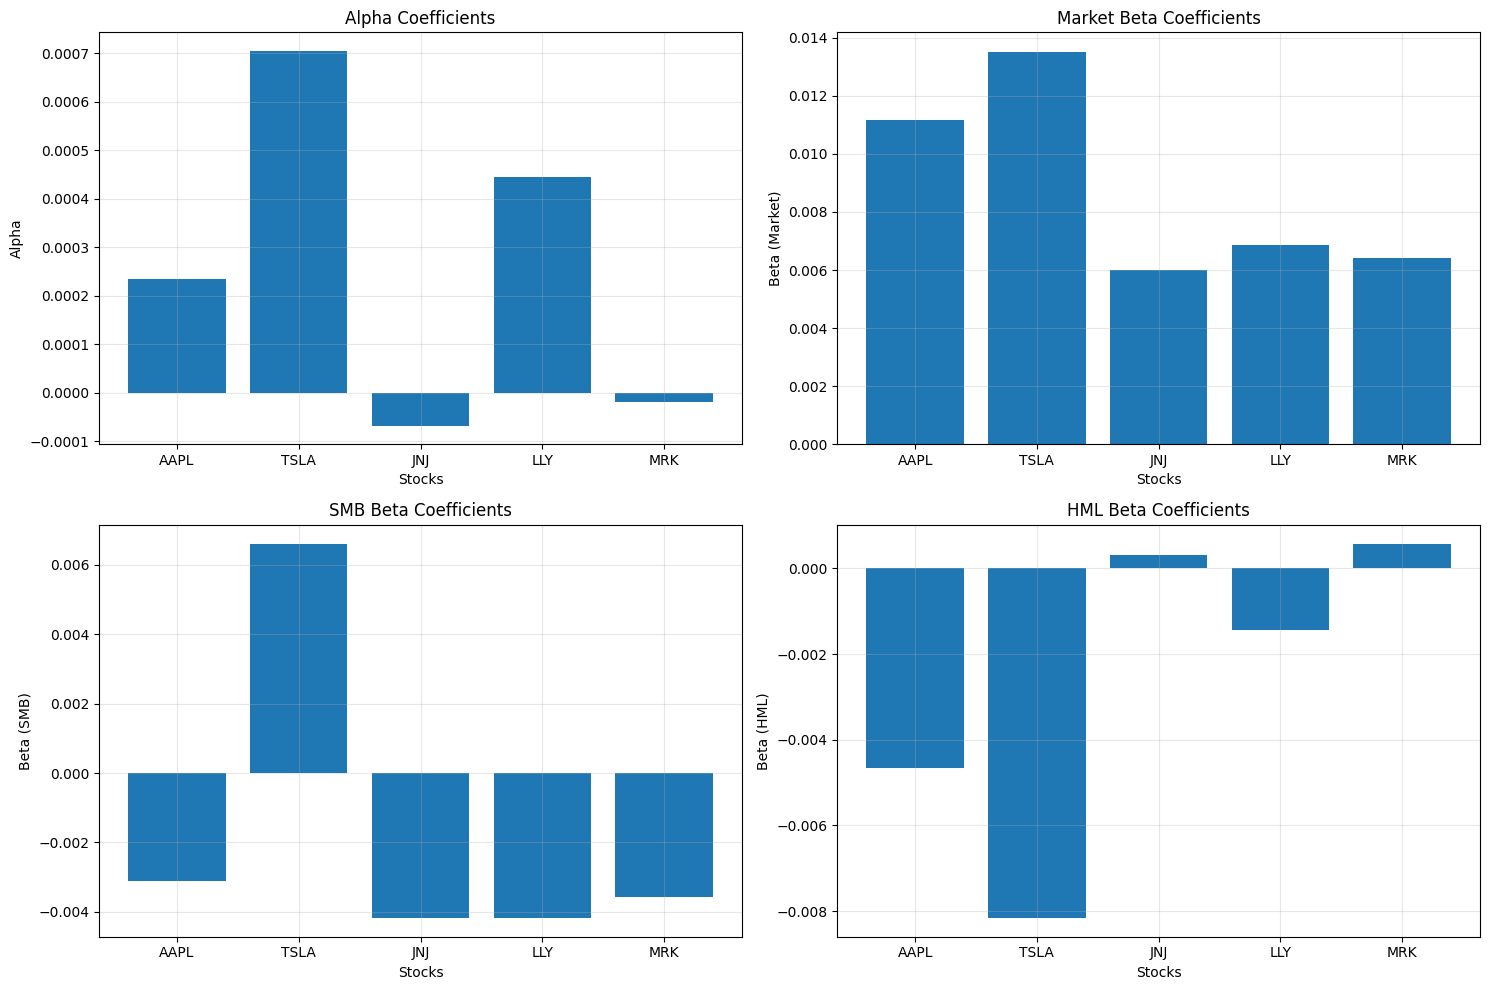


Regression Coefficients:
  Stock     Alpha  Beta_Market  Beta_SMB  Beta_HML
0  AAPL  0.000234     0.011182 -0.003103 -0.004668
1  TSLA  0.000704     0.013510  0.006616 -0.008160
2   JNJ -0.000068     0.006009 -0.004176  0.000306
3   LLY  0.000444     0.006866 -0.004169 -0.001430
4   MRK -0.000020     0.006397 -0.003567  0.000578


In [99]:
# Create lists to store results
alphas = []
betas_mkt = []
betas_smb = []
betas_hml = []
tickers = ['AAPL', 'TSLA', 'JNJ', 'LLY', 'MRK']

# Perform regression for each stock
for ticker in tickers:
    # Prepare data
    X = merged_df[['Mkt-RF', 'SMB', 'HML']]
    y = merged_df[f'Log_Excess_Return_{ticker}']
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store coefficients
    alphas.append(model.intercept_)
    betas_mkt.append(model.coef_[0])
    betas_smb.append(model.coef_[1])
    betas_hml.append(model.coef_[2])

# Create a figure with four subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot alphas
ax1.bar(tickers, alphas)
ax1.set_title('Alpha Coefficients')
ax1.set_xlabel('Stocks')
ax1.set_ylabel('Alpha')
ax1.grid(True, alpha=0.3)

# Plot market betas
ax2.bar(tickers, betas_mkt)
ax2.set_title('Market Beta Coefficients')
ax2.set_xlabel('Stocks')
ax2.set_ylabel('Beta (Market)')
ax2.grid(True, alpha=0.3)

# Plot SMB betas
ax3.bar(tickers, betas_smb)
ax3.set_title('SMB Beta Coefficients')
ax3.set_xlabel('Stocks')
ax3.set_ylabel('Beta (SMB)')
ax3.grid(True, alpha=0.3)

# Plot HML betas
ax4.bar(tickers, betas_hml)
ax4.set_title('HML Beta Coefficients')
ax4.set_xlabel('Stocks')
ax4.set_ylabel('Beta (HML)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the coefficients
results_df = pd.DataFrame({
    'Stock': tickers,
    'Alpha': alphas,
    'Beta_Market': betas_mkt,
    'Beta_SMB': betas_smb,
    'Beta_HML': betas_hml
})
print('\nRegression Coefficients:')
print(results_df)